In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝

In [8]:
data = pd.read_csv(r'C:\Users\dudtj\OneDrive - 숭실대학교 - Soongsil University\Desktop\금융보안원_경진대회\엑셀문서\금융보안원_경진대회_데이터(최종제출).csv',encoding='euc-kr')

In [9]:
data.loc[(data.품목대분류명=='인테리어'),'품목대분류명']='기타'
data.loc[(data.품목대분류명=='가구'),'품목대분류명']='기타'
data.loc[(data.품목대분류코드=='13'),'품목대분류코드']='99'
data.loc[(data.품목대분류코드=='14'),'품목대분류코드']='99'

In [10]:
grouped = data['매출금액'].groupby(data['품목대분류명']).sum()
df_g = pd.DataFrame(grouped)
df_g=df_g.sort_values(by=['매출금액'])

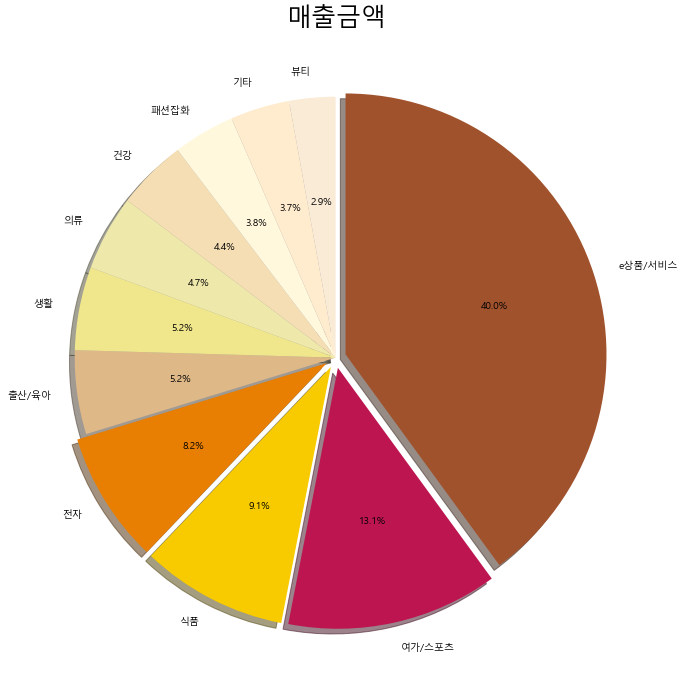

In [11]:

labels = data['매출금액'].groupby(data['품목대분류명']).sum().index
colors = sns.color_palette('hls',len(labels)) 
frequency =data['매출금액'].groupby(data['품목대분류명']).sum() 
 

labels_frequency = zip(labels,frequency,colors) 
labels_frequency = sorted(labels_frequency,key=lambda x: x[1],reverse=True)
 
sorted_labels = [x[0] for x in labels_frequency] 
sorted_frequency = [x[1] for x in labels_frequency] 
sorted_colors = ['sienna','#bd1550','#f8ca00','#e97f02','burlywood','khaki','palegoldenrod','wheat','cornsilk','blanchedalmond','antiquewhite'] ## 정렬된 색상
 
fig = plt.figure(figsize=(12,12)) 
fig.set_facecolor('white') 
ax = fig.add_subplot() 
explode=[0.04,0.04,0.04,0.04,0,0,0,0,0,0,0]
pie = ax.pie(sorted_frequency, 
       labels=sorted_labels,
       startangle=90, 
       counterclock=False, 
       explode=explode,
       colors = sorted_colors,
       shadow=True,
       autopct= '%1.1f%%'
       )
plt.title('매출금액',fontsize=25)
plt.show()

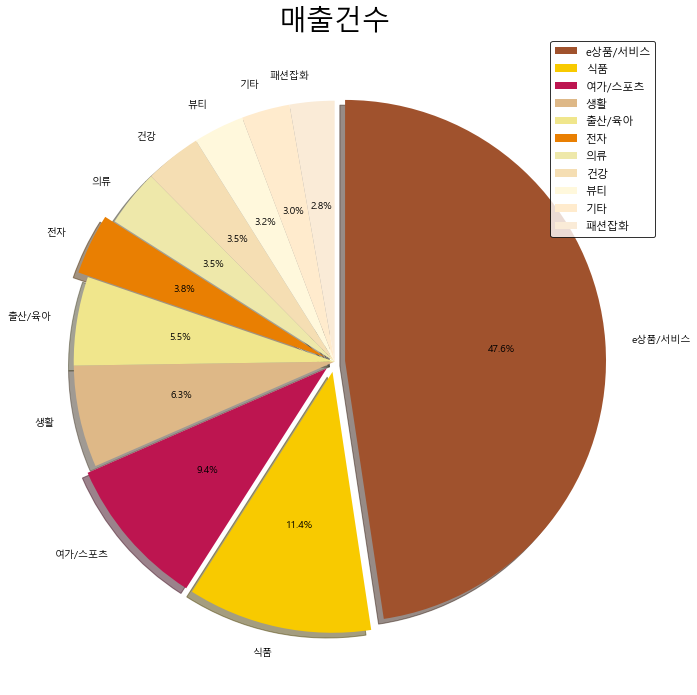

In [12]:
import matplotlib.pyplot as plt
import numpy as np

labels = data['매출건수'].groupby(data['품목대분류명']).sum().index
colors = sns.color_palette('hls',len(labels)) 
frequency =data['매출건수'].groupby(data['품목대분류명']).sum() 
 
labels_frequency = zip(labels,frequency,colors) 
labels_frequency = sorted(labels_frequency,key=lambda x: x[1],reverse=True)
 
sorted_labels = [x[0] for x in labels_frequency] 
sorted_frequency = [x[1] for x in labels_frequency] 
sorted_colors = ['sienna','#f8ca00','#bd1550','burlywood','khaki','#e97f02','palegoldenrod','wheat','cornsilk','blanchedalmond','antiquewhite'] ## 정렬된 색상
 
fig = plt.figure(figsize=(12,12)) 
fig.set_facecolor('white') 
ax = fig.add_subplot() 
explode=[0.04,0.04,0.04,0,0,0.04,0,0,0,0,0]
pie = ax.pie(sorted_frequency, 
       labels=sorted_labels,
       startangle=90, 
       counterclock=False, 
       explode=explode,
       colors = sorted_colors,
       shadow=True,
       autopct= '%1.1f%%' 
       )
plt.title('매출건수',fontsize=28)
plt.legend(pie[0],sorted_labels,loc='upper right',fontsize=11,edgecolor='k') 
plt.show()


식품

In [13]:
data_f = data[data['품목대분류명'] == '식품']
grouped_C = pd.DataFrame(data_f['매출건수'].groupby(data_f['기준년월']).sum())
grouped_M = pd.DataFrame(data_f['매출금액'].groupby(data_f['기준년월']).sum())
df_f = pd.merge(grouped_M, grouped_C, on = '기준년월')
df_f.reset_index(inplace=True)
df_f["기준년월"]=["19_03","19_09","20_03","20_09","21_03"]
df_f

기준년월         매출금액    매출건수
0  19_03  16248504474  475335
1  19_09  13762970433  379678
2  20_03  21001415140  613956
3  20_09  29070121990  749066
4  21_03  22909343697  686292

In [14]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()

scaler.fit(df_f) 
df_f_scaled = scaler.transform(df_f)

df_f_scaled = pd.DataFrame(data = df_f_scaled)

A_n = scaler.fit_transform(df_f['매출금액'].values.reshape(-1,1))
df_f.insert(0, '식품_매출금액_scaled', A_n)
df_f.drop(['매출금액'], axis=1, inplace=True)
B_n = scaler.fit_transform(df_f['매출건수'].values.reshape(-1,1))
df_f.insert(0, '식품_매출건수_scaled', B_n)
df_f.drop(['매출건수'], axis=1, inplace=True)

여가/스포츠

In [15]:
data_s = data[data['품목대분류명'] == '여가/스포츠']
grouped_C = pd.DataFrame(data_s['매출건수'].groupby(data_s['기준년월']).sum())
grouped_M = pd.DataFrame(data_s['매출금액'].groupby(data_s['기준년월']).sum())
df_s = pd.merge(grouped_M, grouped_C, on = '기준년월')
df_s.reset_index(inplace=True)
df_s["기준년월"]=["19_03","19_09","20_03","20_09","21_03"]
df_s

기준년월         매출금액    매출건수
0  19_03  31465627464  490284
1  19_09  33379954820  485056
2  20_03  23146161507  413706
3  20_09  27370537941  471876
4  21_03  33332419725  528049

In [16]:

scaler = StandardScaler()

scaler.fit(df_s)
df_s_scaled = scaler.transform(df_s)

df_s_scaled = pd.DataFrame(data = df_s_scaled)

A_n = scaler.fit_transform(df_s['매출금액'].values.reshape(-1,1))
df_s.insert(0, '여가/스포츠_매출금액_scaled', A_n)
df_s.drop(['매출금액'], axis=1, inplace=True)
B_n = scaler.fit_transform(df_s['매출건수'].values.reshape(-1,1))
df_s.insert(0, '여가/스포츠_매출건수_scaled', B_n)
df_s.drop(['매출건수'], axis=1, inplace=True)

전자

In [17]:
data_j = data[data['품목대분류명'] == '전자']
grouped_C = pd.DataFrame(data_j['매출건수'].groupby(data_j['기준년월']).sum())
grouped_M = pd.DataFrame(data_j['매출금액'].groupby(data_j['기준년월']).sum())
df_j = pd.merge(grouped_M, grouped_C, on = '기준년월')
df_j.reset_index(inplace=True)
df_j["기준년월"]=["19_03","19_09","20_03","20_09","21_03"]
df_j

기준년월         매출금액    매출건수
0  19_03  17594786683  190838
1  19_09  14864182506  175082
2  20_03  19465849742  208306
3  20_09  19927105222  179644
4  21_03  20845438446  206078

In [18]:
scaler = StandardScaler()

scaler.fit(df_j)
df_j_scaled = scaler.transform(df_j)

df_j_scaled = pd.DataFrame(data = df_j_scaled)


A_n = scaler.fit_transform(df_j['매출금액'].values.reshape(-1,1))
df_j.insert(0, '전자_매출금액_scaled', A_n)
df_j.drop(['매출금액'], axis=1, inplace=True)
B_n = scaler.fit_transform(df_j['매출건수'].values.reshape(-1,1))
df_j.insert(0, '전자_매출건수_scaled', B_n)
df_j.drop(['매출건수'], axis=1, inplace=True)

E상품/서비스

In [19]:
data_e = data[data['품목대분류명'] == 'e상품/서비스']
grouped_C = pd.DataFrame(data_e['매출건수'].groupby(data_e['기준년월']).sum())
grouped_M = pd.DataFrame(data_e['매출금액'].groupby(data_e['기준년월']).sum())
df_e = pd.merge(grouped_M, grouped_C, on = '기준년월')
df_e.reset_index(inplace=True)
df_e["기준년월"]=["19_03","19_09","20_03","20_09","21_03"]
df_e

기준년월          매출금액     매출건수
0  19_03   70203016159  1884001
1  19_09   72558768943  1876005
2  20_03   94641594663  2610928
3  20_09  100350879131  2598550
4  21_03  116421252063  3139815

In [20]:
scaler = StandardScaler()

scaler.fit(df_e) 
df_e_scaled = scaler.transform(df_e)

df_e_scaled = pd.DataFrame(data = df_e_scaled)

A_n = scaler.fit_transform(df_e['매출금액'].values.reshape(-1,1))
df_e.insert(0, 'e상품/서비스_매출금액_scaled', A_n)
df_e.drop(['매출금액'], axis=1, inplace=True)
B_n = scaler.fit_transform(df_e['매출건수'].values.reshape(-1,1))
df_e.insert(0, 'e상품/서비스_매출건수_scaled', B_n)
df_e.drop(['매출건수'], axis=1, inplace=True)
df_e

e상품/서비스_매출건수_scaled  e상품/서비스_매출금액_scaled   기준년월
0            -1.112040            -1.183566  19_03
1            -1.128572            -1.048427  19_09
2             0.390905             0.218361  20_03
3             0.365313             0.545875  20_09
4             1.484396             1.467757  21_03

<function matplotlib.pyplot.show(close=None, block=None)>

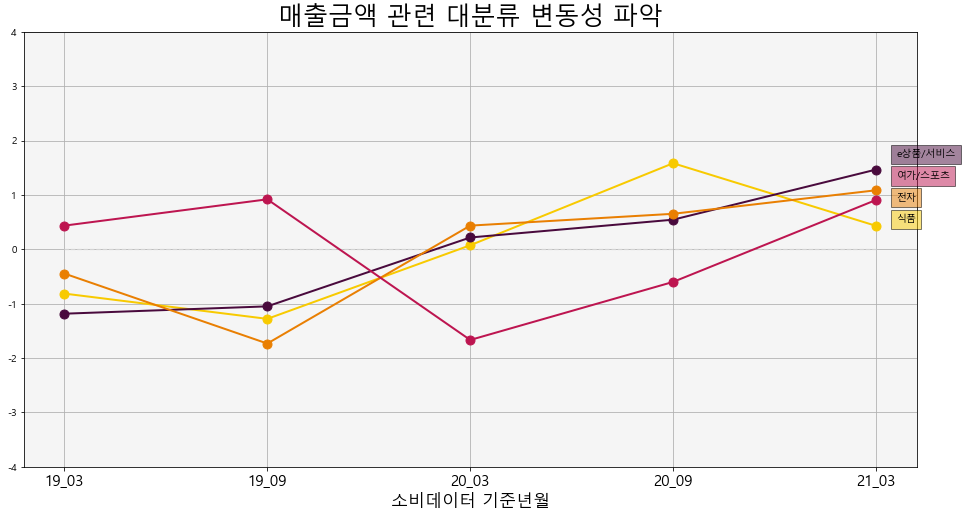

In [21]:
fig=plt.figure(figsize=(16,8))
ax=fig.add_subplot()
ax.plot(df_f['기준년월'],df_f['식품_매출금액_scaled'],'-o',color='#f8ca00',markersize=9,linewidth=2,label='식품')
ax.plot(df_f['기준년월'],df_e['e상품/서비스_매출금액_scaled'],'-o',color='#490a3d',markersize=9,linewidth=2,label='e상품/서비스')
ax.plot(df_f['기준년월'],df_j['전자_매출금액_scaled'],'-o',markersize=9,color='#e97f02',linewidth=2,label='전자')
ax.plot(df_f['기준년월'],df_s['여가/스포츠_매출금액_scaled'],'-o',markersize=9,color='#bd1550',linewidth=2,label='여가/스포츠')

plt.title('매출금액 관련 대분류 변동성 파악', fontsize = 25)

plt.xticks(fontsize = 15)
plt.xlabel('소비데이터 기준년월', fontsize = 17)
plt.hlines(0, 0, 4,color='lightgray', linestyle='--', linewidth=1.2)
plt.ylim(-4,4)
ax.set_facecolor('whitesmoke')
ax.grid(True)

ax.text(4.1, 0.5, '식품', style='italic',
        bbox={'facecolor': '#f8ca00', 'alpha': 0.5, 'pad': 5})
ax.text(4.1, 1.7, 'e상품/서비스', style='italic',
        bbox={'facecolor': '#490a3d', 'alpha': 0.5, 'pad': 5})
ax.text(4.1, 0.9, '전자', style='italic',
        bbox={'facecolor': '#e97f02', 'alpha': 0.5, 'pad': 5})
ax.text(4.1, 1.3, '여가/스포츠', style='italic',
        bbox={'facecolor': '#bd1550', 'alpha': 0.5, 'pad': 5})
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

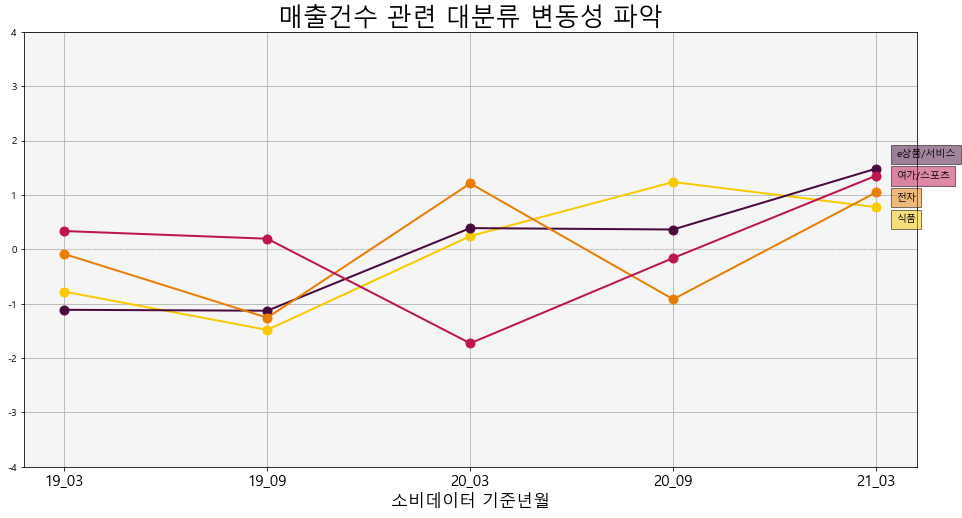

In [22]:
fig=plt.figure(figsize=(16,8))
ax=fig.add_subplot()
ax.plot(df_f['기준년월'],df_f['식품_매출건수_scaled'],'-o',color='#f8ca00',markersize=9,linewidth=2,label='식품')
ax.plot(df_f['기준년월'],df_e['e상품/서비스_매출건수_scaled'],'-o',color='#490a3d',markersize=9,linewidth=2,label='e상품/서비스')
ax.plot(df_f['기준년월'],df_j['전자_매출건수_scaled'],'-o',markersize=9,color='#e97f02',linewidth=2,label='전자')
ax.plot(df_f['기준년월'],df_s['여가/스포츠_매출건수_scaled'],'-o',markersize=9,color='#bd1550',linewidth=2,label='여가/스포츠')

plt.title('매출건수 관련 대분류 변동성 파악', fontsize = 25)

plt.xticks(fontsize = 15)
plt.xlabel('소비데이터 기준년월', fontsize = 17)
plt.hlines(0, 0, 4,color='lightgray', linestyle='--', linewidth=1.2)
plt.ylim(-4,4)
ax.set_facecolor('whitesmoke')
ax.grid(True)

ax.text(4.1, 0.5, '식품', style='italic',
        bbox={'facecolor': '#f8ca00', 'alpha': 0.5, 'pad': 5})
ax.text(4.1, 1.7, 'e상품/서비스', style='italic',
        bbox={'facecolor': '#490a3d', 'alpha': 0.5, 'pad': 5})
ax.text(4.1, 0.9, '전자', style='italic',
        bbox={'facecolor': '#e97f02', 'alpha': 0.5, 'pad': 5})
ax.text(4.1, 1.3, '여가/스포츠', style='italic',
        bbox={'facecolor': '#bd1550', 'alpha': 0.5, 'pad': 5})
plt.show

병욱이형

In [23]:
data = pd.read_csv(r'C:\Users\dudtj\OneDrive\Desktop\금융보안원_경진대회\엑셀문서\금융보안원_경진대회_데이터(최종제출).csv',encoding='euc-kr')
timeindex_6 = pd.date_range('2019.03', periods= 5, freq= '6M')
df_M = pd.DataFrame(data['매출금액'].groupby(data['기준년월']).sum())
df_C = pd.DataFrame(data['매출건수'].groupby(data['기준년월']).sum())
df_M.reset_index(inplace=True); df_C.reset_index(inplace=True)
df_M.drop('기준년월', axis= 1, inplace=True); df_C.drop('기준년월', axis= 1, inplace=True)
df_M.index = timeindex_6; df_C.index = timeindex_6
df_M.reset_index(inplace=True);df_C.reset_index(inplace=True)
df_M

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\dudtj\\OneDrive\\Desktop\\금융보안원_경진대회\\엑셀문서\\금융보안원_경진대회_데이터(최종제출).csv'

In [ ]:
MC_merge = pd.merge(df_M, df_C, on = 'index', how = 'inner')
MC_merge.set_index('index', inplace=True)
df_f_upsample  = MC_merge.resample('M').mean()
df_f_upsample = df_f_upsample.interpolate(method='values')
df_f_upsample


매출금액          매출건수
index                                 
2019-03-31  2.021114e+11  4.545816e+06
2019-04-30  2.005993e+11  4.475434e+06
2019-05-31  1.990368e+11  4.402705e+06
2019-06-30  1.975246e+11  4.332323e+06
2019-07-31  1.959621e+11  4.259595e+06
2019-08-31  1.943995e+11  4.186866e+06
2019-09-30  1.928874e+11  4.116484e+06
2019-10-31  1.992327e+11  4.326147e+06
2019-11-30  2.053733e+11  4.529046e+06
2019-12-31  2.117186e+11  4.738709e+06
2020-01-31  2.180640e+11  4.948372e+06
2020-02-29  2.239999e+11  5.144508e+06
2020-03-31  2.303452e+11  5.354171e+06
2020-04-30  2.319217e+11  5.341888e+06
2020-05-31  2.335507e+11  5.329195e+06
2020-06-30  2.351272e+11  5.316912e+06
2020-07-31  2.367563e+11  5.304220e+06
2020-08-31  2.383853e+11  5.291527e+06
2020-09-30  2.399618e+11  5.279244e+06
2020-10-31  2.452747e+11  5.423893e+06
2020-11-30  2.504161e+11  5.563876e+06
2020-12-31  2.557290e+11  5.708525e+06
2021-01-31  2.610419e+11  5.853174e+06
2021-02-28  2.658406e+11  5.983825e+06
2021-03-31  2.711535e+11  6.128474e+06

In [ ]:
from sklearn.preprocessing import StandardScaler
Timeindex = pd.date_range('2019.03', periods= 25, freq = 'M')
scaler = StandardScaler()
scaled = scaler.fit_transform(df_f_upsample)
df_scaled = pd.DataFrame(scaled, columns= df_f_upsample.columns, index= Timeindex)
df_scaled.reset_index(inplace=True)
df_scaled

index      매출금액      매출건수
0  2019-03-31 -0.968673 -0.830590
1  2019-04-30 -1.031418 -0.949996
2  2019-05-31 -1.096253 -1.073382
3  2019-06-30 -1.158997 -1.192787
4  2019-07-31 -1.223833 -1.316173
5  2019-08-31 -1.288669 -1.439559
6  2019-09-30 -1.351413 -1.558965
7  2019-10-31 -1.088123 -1.203265
8  2019-11-30 -0.833326 -0.859040
9  2019-12-31 -0.570035 -0.503341
10 2020-01-31 -0.306745 -0.147641
11 2020-02-29 -0.060441  0.185110
12 2020-03-31  0.202849  0.540810
13 2020-04-30  0.268263  0.519971
14 2020-05-31  0.335858  0.498438
15 2020-06-30  0.401272  0.477599
16 2020-07-31  0.468867  0.456066
17 2020-08-31  0.536461  0.434532
18 2020-09-30  0.601875  0.413694
19 2020-10-31  0.822326  0.659095
20 2020-11-30  1.035665  0.896581
21 2020-12-31  1.256115  1.141983
22 2021-01-31  1.476565  1.387384
23 2021-02-28  1.675681  1.609037
24 2021-03-31  1.896131  1.854439

In [ ]:
df2 = pd.read_excel('C:/Users/dudtj/OneDrive/Desktop/python/금융데이터/소비지수/소비평가지수.xlsx')
Timeindex = pd.date_range('2019.03', periods=len(df2), freq='M')
df2.set_index(Timeindex, inplace=True)
df2.drop('일자', axis = 1,inplace=True)
df2.fillna(0, inplace=True) #NaN값은 코로나 컬럼에만 있으므로 다 0으로 채워도 상관없음
df2 = df2.iloc[:25, :]

df_corona = df2['코로나 확진자 수 (총합)']
df_corona = df_corona.reset_index()

In [ ]:
MC_corona = pd.merge(df_corona, df_scaled, on = 'index', how = 'inner')
MC_corona['index'] = MC_corona['index'].astype(str).str[:-3]
MC_corona

index  코로나 확진자 수 (총합)      매출금액      매출건수
0   2019-03             0.0 -0.968673 -0.830590
1   2019-04             0.0 -1.031418 -0.949996
2   2019-05             0.0 -1.096253 -1.073382
3   2019-06             0.0 -1.158997 -1.192787
4   2019-07             0.0 -1.223833 -1.316173
5   2019-08             0.0 -1.288669 -1.439559
6   2019-09             0.0 -1.351413 -1.558965
7   2019-10             0.0 -1.088123 -1.203265
8   2019-11             0.0 -0.833326 -0.859040
9   2019-12             0.0 -0.570035 -0.503341
10  2020-01            11.0 -0.306745 -0.147641
11  2020-02          2920.0 -0.060441  0.185110
12  2020-03          6855.0  0.202849  0.540810
13  2020-04           979.0  0.268263  0.519971
14  2020-05           703.0  0.335858  0.498438
15  2020-06          1331.0  0.401272  0.477599
16  2020-07          1506.0  0.468867  0.456066
17  2020-08          5641.0  0.536461  0.434532
18  2020-09          3865.0  0.601875  0.413694
19  2020-10          2700.0  0.822326  0.659095
20  2020-11          7688.0  1.035665  0.896581
21  2020-12         26528.0  1.256115  1.141983
22  2021-01         17471.0  1.476565  1.387384
23  2021-02         11467.0  1.675681  1.609037
24  2021-03         13415.0  1.896131  1.854439

In [ ]:
MC_scaled = MC_corona.iloc[[0, 6, 12, 18, 24], :]
MC_scaled

index  코로나 확진자 수 (총합)      매출금액      매출건수
0   2019-03             0.0 -0.968673 -0.830590
6   2019-09             0.0 -1.351413 -1.558965
12  2020-03          6855.0  0.202849  0.540810
18  2020-09          3865.0  0.601875  0.413694
24  2021-03         13415.0  1.896131  1.854439

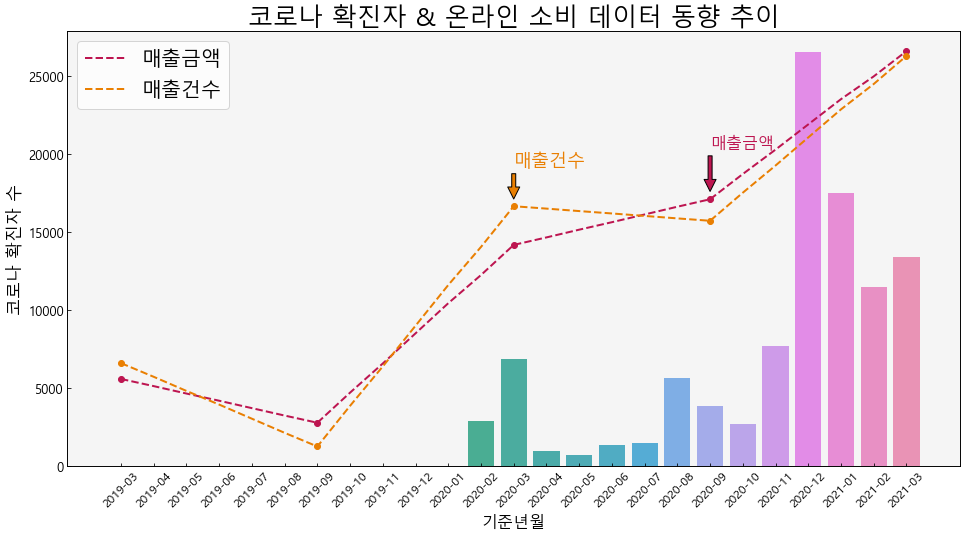

In [ ]:
X = MC_corona['index']
X2 = MC_scaled['index']
y = MC_corona['코로나 확진자 수 (총합)']
fig, ax1 = plt.subplots(figsize = (16, 8))
ax1.set_title('코로나 확진자 & 온라인 소비 데이터 동향 추이', fontsize = 25)
sns.barplot(x = 'index', y = '코로나 확진자 수 (총합)', data = MC_corona, ax = ax1)
ax1.tick_params(axis='both', direction='in')
plt.xticks(rotation = 45, fontsize = 12)
plt.yticks(fontsize = 13)
plt.xlabel('기준년월', fontsize = 16)
plt.ylabel('코로나 확진자 수', fontsize = 17)
ax1.set_facecolor('whitesmoke')

ax2 = ax1.twinx()
l1, = ax2.plot(X, MC_corona['매출금액'], '--', color = '#bd1550', alpha = 1, linewidth = 2) 
l2, = ax2.plot(X, MC_corona['매출건수'], '--', color = '#e97f02', alpha = 1, linewidth = 2)
ax2.plot(X2, MC_scaled['매출금액'], 'o', color = '#bd1550') 
ax2.plot(X2, MC_scaled['매출건수'], 'o', color = '#e97f02')
ax2.legend(handles = (l1, l2), labels = ['매출금액', '매출건수'], fontsize = 20) 
ax2.axes.yaxis.set_visible(False)
ax2.annotate('매출금액', xy = (X[18], MC_scaled['매출금액'][18] + 0.05), xytext = (X[18], MC_scaled['매출금액'][18] + 0.45), arrowprops = dict(facecolor = '#bd1550', shrink = 0.05), fontsize = 16, color = '#bd1550')
ax2.annotate('매출건수', xy = (X[12], MC_scaled['매출건수'][12] + 0.05), xytext = (X[12], MC_scaled['매출건수'][12] + 0.35), arrowprops = dict(facecolor = '#e97f02', shrink = 0.05), fontsize = 18, color = '#e97f02')
ax2.tick_params(axis='y', direction='in')

In [ ]:
def get_category(category, df):
    category_df = df[df['종목명'] == category]
    category_df = category_df[['종목명','종가', '시가총액', '기준년월']]
    category_df.set_index('기준년월', inplace = True)
    return category_df

def get_category_2(category, df):
    category_df = df[df['종목명'] == category]
    category_df = category_df[['종목명', '시가총액']]
    return category_df

def get_category_3(df):
    df = df['시가총액']
    return df

In [ ]:
path = 'C:/Users/dudtj/OneDrive/Desktop/python/금융데이터/KRX 엑셀문서/전종목 시세/'
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith('.csv')]
file_list_py

df = pd.DataFrame()
Timeindex = pd.date_range('9/1/2018', periods= len(file_list_py), freq = 'M')
for i, time in zip(file_list_py,Timeindex):
    data = pd.read_csv(path + i, encoding= 'cp949')
    data_df = pd.DataFrame(data)
    data_df['기준년월'] = time
    df = pd.concat([df, data])
 
df_MC = df.reset_index(drop=True)

xlsx = pd.ExcelFile('C:/Users/dudtj/OneDrive/Desktop/python/금융데이터/관련종목.xlsx')
inv_category_F = pd.read_excel(xlsx, sheet_name = '식품')
category_list_F = inv_category_F['종목명'].tolist()
category_df_list = []
for i in range(len(category_list_F)):
     category_df_list.append(get_category(category_list_F[i], df_MC))

df = pd.DataFrame(index = Timeindex)
df.index.names = ['기준년월']
cri_9_1_df = pd.read_csv('C:/Users/dudtj/OneDrive/Desktop/python/금융데이터/KRX 엑셀문서/18.09.03.csv', encoding='cp949')

df_list = []
for i in range(len(category_list_F)):
     if category_list_F[i] in cri_9_1_df['종목명'].tolist():
          df_list.append(get_category_2(category_list_F[i], cri_9_1_df))
     else: 
          pass

df_MC_list = []
for i in range(len(df_list)):
    df_MC_list.append(df_list[i]['시가총액'])

cri_MC_9_1 = np.array(df_MC_list).sum()

MC_list = []
for i in range(len(category_df_list)):
    MC_list.append(get_category_3(category_df_list[i]))

from functools import reduce
df_merge = reduce(lambda left, right : pd.merge(left, right, on = '기준년월', how = 'outer'), MC_list)
df_merge.fillna(0, inplace= True)
df_merge  =df_merge/100000000
df_merge.columns = range(len(df_merge.columns))
alpha = []
list1 = []
for i in np.arange(1,35):
    if 0 in df_merge.iloc[i-1, :].tolist():
        A = df_merge.iloc[i, :].sum()
        zero_list = df_merge.iloc[i-1,:][df_merge.iloc[i-1, : ] == 0].index.tolist()
        for j in range(len(zero_list)):
            alpha.append(df_merge.iloc[i,zero_list[j]])
        alpha_sum = np.array(alpha).sum()
        list1.append(df_merge.iloc[i, :].sum()/(cri_MC_9_1 + alpha_sum/A))
    elif 0 not in df_merge.iloc[i-1, :].tolist():
        list1.append(df_merge.iloc[i, :].sum()/cri_MC_9_1)

list1.insert(0, df_merge.iloc[0, :].sum()/cri_MC_9_1)
Timeindex_shift = pd.date_range('8/1/2018', periods= len(file_list_py), freq = 'M')
df = pd.DataFrame(list1, index = Timeindex_shift)
df.reset_index(inplace=True)
df.columns = ['index', '주가지수']
df

index          주가지수
0  2018-08-31  1.026637e-08
1  2018-09-30  8.740130e-09
2  2018-10-31  9.558351e-09
3  2018-11-30  9.360772e-09
4  2018-12-31  9.967054e-09
5  2019-01-31  9.933799e-09
6  2019-02-28  1.028999e-08
7  2019-03-31  1.037902e-08
8  2019-04-30  9.440447e-09
9  2019-05-31  9.587350e-09
10 2019-06-30  8.871834e-09
11 2019-07-31  8.427215e-09
12 2019-08-31  9.040034e-09
13 2019-09-30  8.910696e-09
14 2019-10-31  8.900058e-09
15 2019-11-30  9.043148e-09
16 2019-12-31  8.588536e-09
17 2020-01-31  8.147667e-09
18 2020-02-29  7.464756e-09
19 2020-03-31  9.178237e-09
20 2020-04-30  9.448548e-09
21 2020-05-31  9.482416e-09
22 2020-06-30  9.751770e-09
23 2020-07-31  1.008253e-08
24 2020-08-31  9.785321e-09
25 2020-09-30  9.512525e-09
26 2020-10-31  1.010688e-08
27 2020-11-30  1.058539e-08
28 2020-12-31  1.039189e-08
29 2021-01-31  1.056177e-08
30 2021-02-28  1.091501e-08
31 2021-03-31  1.116771e-08
32 2021-04-30  1.196506e-08
33 2021-05-31  1.243171e-08
34 2021-06-30  1.174766e-08

In [ ]:
data = pd.read_csv(r'C:\Users\dudtj\OneDrive\Desktop\python\금융데이터\금융보안원_경진대회_데이터(최종제출)1.csv',encoding='euc-kr')
data = data[data['품목대분류명'] == '식품']
grouped_M = pd.DataFrame(data['매출금액'].groupby(data['기준년월']).sum())
grouped_C = pd.DataFrame(data['매출건수'].groupby(data['기준년월']).sum())
data_merge = pd.merge(grouped_M, grouped_C, on = '기준년월')
data_merge

매출금액    매출건수
기준년월                       
201903  16248504474  475335
201909  13762970433  379678
202003  21001415140  613956
202009  29070121990  749066
202103  22909343697  686292

In [ ]:
def get_grouped(data, category, target, filter_category):
    filter_data = data[data[category] == target]
    grouped_filter = pd.DataFrame(filter_data[filter_category].groupby(filter_data['기준년월']).sum())
    grouped_filter.columns = [filter_category + '_' + target]
    return grouped_filter

In [ ]:
col_list = ['성별', '연령', '가구생애주기', '고객소재지_광역시도']
params_list = []
for cat in col_list:
    values_list = data[cat].unique().tolist()
    for  i in range(len(values_list)):
        params = [data, cat, values_list[i]]
        params_list.append(params)

dfmerge_list_M = []
for param in params_list:
    dfmerge_list_M.append(get_grouped(param[0], param[1], param[2], '매출금액'))

df_merge_M = reduce(lambda left, right : pd.merge(left, right, on = '기준년월', how = 'outer'), dfmerge_list_M)

merge_list = [data_merge, df_merge_M]
df_merge_all = reduce(lambda left, right : pd.merge(left, right, on = '기준년월', how = 'outer'), merge_list)
Timeindex = pd.date_range('2019.03', periods= 5, freq= '6M')
df_merge_all.index = Timeindex
df_merge_all.reset_index(inplace=True)
df_merge_all_M = pd.merge(df_merge_all, df, on = 'index', how = 'inner')
df_merge_all_M

index         매출금액    매출건수      매출금액_여성     매출금액_남성     매출금액_40대  \
0 2019-03-31  16248504474  475335  11244754242  5003750232   6447948402   
1 2019-09-30  13762970433  379678  10089510868  3673459565   4784068040   
2 2020-03-31  21001415140  613956  16049045340  4952369800   7825253812   
3 2020-09-30  29070121990  749066  21309539672  7760582318  11513762718   
4 2021-03-31  22909343697  686292  16951383657  5957960040   8666113200   

     매출금액_50대    매출금액_20대    매출금액_30대  매출금액_60대 이상  매출금액_20세 미만  매출금액_초중고자녀가구  \
0  2129079004   872763371  6229971078    568435822       306797    5162383920   
1  2036037481  1437209814  4848856251    652936983      3861864    3853272745   
2  3121676046  1955859795  7121493426    970796268      6335793    6347748711   
3  6407929821  1586157535  7194677939   2365584981      2008996    9590929966   
4  4263874287  1935930864  6546231629   1491315383      5878334    6864699655   

   매출금액_신혼영유아가구  매출금액_성인자녀가구   매출금액_1인가구   매출금액_노인가구   매출금액_서울특별시    매출금액_경기도  \
0    7153031533   2322745587  1041907612   568435822   9933864364  3956703200   
1    5437092217   2241552675  1578115813   652936983   8600199223  3306585280   
2    8004204137   3414137866  2264528158   970796268  13044730911  5185426007   
3    8470911270   6820487486  1822208287  2365584981  18454187386  6983750835   
4    7975480059   4005976154  2571872446  1491315383  14166404179  5680982268   

   매출금액_인천광역시          주가지수  
0  2357936910  1.037902e-08  
1  1856185930  8.910696e-09  
2  2771258222  9.178237e-09  
3  3632183769  9.512525e-09  
4  3061957250  1.116771e-08

In [ ]:
from sklearn.preprocessing import StandardScaler

df_MC_N = df_merge_all_M[['index', '매출금액', '매출건수', '주가지수']]
df_MC_N.set_index('index', inplace= True)
scaler = StandardScaler()
Timeindex = pd.date_range('2019.03', periods= 5, freq= '6M')
MC_N_scaled = scaler.fit_transform(df_MC_N[['매출금액', '매출건수', '주가지수']])
df_MC_Nscaled = pd.DataFrame(MC_N_scaled, columns= ['매출금액', '매출건수', '주가지수'], index = Timeindex)
df_MC_Nscaled.reset_index(inplace=True)
df_MC_Nscaled['index'] = df_MC_Nscaled['index'].astype(str).str[:-3]
df_MC_Nscaled

index      매출금액      매출건수      주가지수
0  2019-03 -0.813632 -0.777498  0.660267
1  2019-09 -1.278534 -1.482253 -1.104421
2  2020-03  0.075368  0.243796 -0.782879
3  2020-09  1.584565  1.239222 -0.381118
4  2021-03  0.432233  0.776733  1.608151

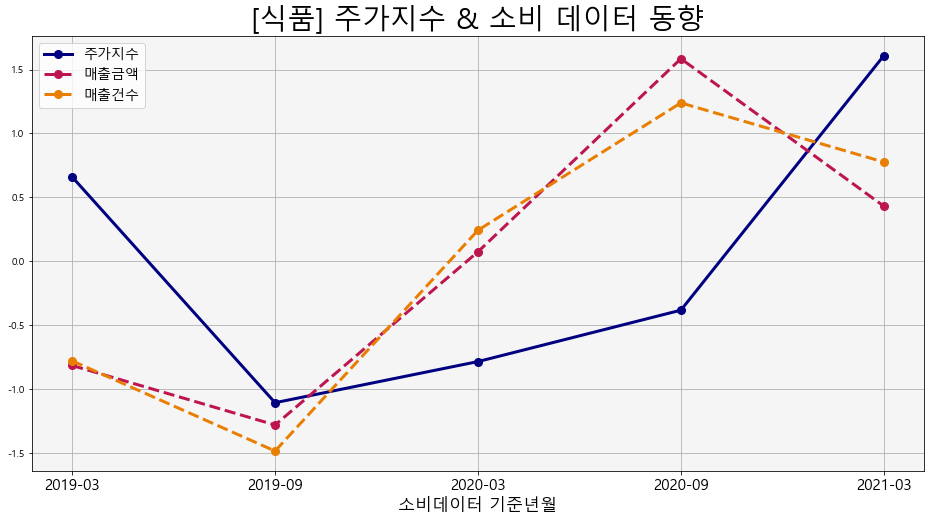

In [ ]:
X = df_MC_Nscaled['index']
fig, ax = plt.subplots(figsize = (16, 8))
l1, = ax.plot(X, df_MC_Nscaled['주가지수'], '-o', color = 'navy', linewidth = 3, markersize= 8)
l2, = ax.plot(X, df_MC_Nscaled['매출금액'], '--o', color ='#bd1550', alpha = 1, linewidth = 3, markersize= 8)
l3, = ax.plot(X, df_MC_Nscaled['매출건수'], '--o', color = '#e97f02', alpha = 1, linewidth = 3, markersize= 8)
ax.legend(handles = (l1, l2, l3), labels = ['주가지수', '매출금액', '매출건수'], fontsize = 14)
ax.set_title('[식품] 주가지수 & 소비 데이터 동향', fontsize = 28)
ax.set_facecolor('whitesmoke')
ax.grid(True)
plt.xticks(fontsize = 15)
plt.xlabel('소비데이터 기준년월', fontsize = 17)
plt.show()

In [ ]:
path = 'C:/Users/dudtj/OneDrive/Desktop/python/금융데이터/KRX 엑셀문서/전종목 시세/'
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith('.csv')]
file_list_py

df = pd.DataFrame()
Timeindex = pd.date_range('9/1/2018', periods= len(file_list_py), freq = 'M')
for i, time in zip(file_list_py,Timeindex):
    data = pd.read_csv(path + i, encoding= 'cp949')
    data_df = pd.DataFrame(data)
    data_df['기준년월'] = time
    df = pd.concat([df, data])
 
df_MC = df.reset_index(drop=True)

xlsx = pd.ExcelFile('C:/Users/dudtj/OneDrive/Desktop/python/금융데이터/관련종목.xlsx')
inv_category_F = pd.read_excel(xlsx, sheet_name = 'e상품-서비스')
category_list_F = inv_category_F['종목명'].tolist()
category_df_list = []
for i in range(len(category_list_F)):
     category_df_list.append(get_category(category_list_F[i], df_MC))

df = pd.DataFrame(index = Timeindex)
df.index.names = ['기준년월']
cri_9_1_df = pd.read_csv('C:/Users/dudtj/OneDrive/Desktop/python/금융데이터/KRX 엑셀문서/18.09.03.csv', encoding='cp949')

df_list = []
for i in range(len(category_list_F)):
     if category_list_F[i] in cri_9_1_df['종목명'].tolist():
          df_list.append(get_category_2(category_list_F[i], cri_9_1_df))
     else: 
          pass
    
df_MC_list = []
for i in range(len(df_list)):
    df_MC_list.append(df_list[i]['시가총액'])

cri_MC_9_1 = np.array(df_MC_list).sum()

MC_list = []
for i in range(len(category_df_list)):
    MC_list.append(get_category_3(category_df_list[i]))

from functools import reduce
df_merge = reduce(lambda left, right : pd.merge(left, right, on = '기준년월', how = 'outer'), MC_list)
df_merge.fillna(0, inplace= True)
df_merge  =df_merge/100000000
df_merge.columns = range(len(df_merge.columns))
alpha = []
list1 = []
for i in np.arange(1,35):
    if 0 in df_merge.iloc[i-1, :].tolist():
        A = df_merge.iloc[i, :].sum()
        zero_list = df_merge.iloc[i-1,:][df_merge.iloc[i-1, : ] == 0].index.tolist()
        for j in range(len(zero_list)):
            alpha.append(df_merge.iloc[i,zero_list[j]])
        alpha_sum = np.array(alpha).sum()
        list1.append(df_merge.iloc[i, :].sum()/(cri_MC_9_1 + alpha_sum/A))
    elif 0 not in df_merge.iloc[i-1, :].tolist():
        list1.append(df_merge.iloc[i, :].sum()/cri_MC_9_1)

list1.insert(0, df_merge.iloc[0, :].sum()/cri_MC_9_1)
Timeindex_shift = pd.date_range('8/1/2018', periods= len(file_list_py), freq = 'M')
df = pd.DataFrame(list1, index = Timeindex_shift)
df.reset_index(inplace=True)
df.columns = ['index', '주가지수']
df

index          주가지수
0  2018-08-31  9.939810e-09
1  2018-09-30  8.903420e-09
2  2018-10-31  9.135718e-09
3  2018-11-30  8.310728e-09
4  2018-12-31  9.261898e-09
5  2019-01-31  9.359291e-09
6  2019-02-28  9.319194e-09
7  2019-03-31  9.597818e-09
8  2019-04-30  8.904751e-09
9  2019-05-31  9.487784e-09
10 2019-06-30  9.203185e-09
11 2019-07-31  9.033883e-09
12 2019-08-31  9.649852e-09
13 2019-09-30  9.806813e-09
14 2019-10-31  9.848991e-09
15 2019-11-30  1.062646e-08
16 2019-12-31  1.061175e-08
17 2020-01-31  1.010335e-08
18 2020-02-29  8.964404e-09
19 2020-03-31  9.686582e-09
20 2020-04-30  1.022697e-08
21 2020-05-31  1.063058e-08
22 2020-06-30  1.141724e-08
23 2020-07-31  1.147881e-08
24 2020-08-31  1.194201e-08
25 2020-09-30  1.142012e-08
26 2020-10-31  1.299492e-08
27 2020-11-30  1.510985e-08
28 2020-12-31  1.588355e-08
29 2021-01-31  1.626137e-08
30 2021-02-28  1.616486e-08
31 2021-03-31  1.622327e-08
32 2021-04-30  1.630891e-08
33 2021-05-31  1.695385e-08
34 2021-06-30  1.644728e-08

In [ ]:
data = pd.read_csv(r'C:\Users\dudtj\OneDrive\Desktop\python\금융데이터\금융보안원_경진대회_데이터(최종제출)1.csv',encoding='euc-kr')
data = data[data['품목대분류명'] == 'e상품/서비스']
grouped_M = pd.DataFrame(data['매출금액'].groupby(data['기준년월']).sum())
grouped_C = pd.DataFrame(data['매출건수'].groupby(data['기준년월']).sum())
data_merge = pd.merge(grouped_M, grouped_C, on = '기준년월')
data_merge

매출금액     매출건수
기준년월                         
201903   70203016159  1884001
201909   72558768943  1876005
202003   94641594663  2610928
202009  100350879131  2598550
202103  116421252063  3139815

In [ ]:
col_list = ['성별', '연령', '가구생애주기', '고객소재지_광역시도']
params_list = []
for cat in col_list:
    values_list = data[cat].unique().tolist()
    for  i in range(len(values_list)):
        params = [data, cat, values_list[i]]
        params_list.append(params)

dfmerge_list_M = []
for param in params_list:
    dfmerge_list_M.append(get_grouped(param[0], param[1], param[2], '매출금액'))

df_merge_M = reduce(lambda left, right : pd.merge(left, right, on = '기준년월', how = 'outer'), dfmerge_list_M)

merge_list = [data_merge, df_merge_M]
df_merge_all = reduce(lambda left, right : pd.merge(left, right, on = '기준년월', how = 'outer'), merge_list)
Timeindex = pd.date_range('2019.03', periods= 5, freq= '6M')
df_merge_all.index = Timeindex
df_merge_all.reset_index(inplace=True)
df_merge_all_M = pd.merge(df_merge_all, df, on = 'index', how = 'inner')
df_merge_all_M

index          매출금액     매출건수      매출금액_여성      매출금액_남성     매출금액_20대  \
0 2019-03-31   70203016159  1884001  44930228976  25272787183  10432462831   
1 2019-09-30   72558768943  1876005  46317432534  26241336409  17177283545   
2 2020-03-31   94641594663  2610928  63232865217  31408729446  20206036568   
3 2020-09-30  100350879131  2598550  62268447261  38082431870  15932851645   
4 2021-03-31  116421252063  3139815  75959212626  40462039437  20940476222   

      매출금액_30대     매출금액_40대  매출금액_60대 이상     매출금액_50대  매출금액_20세 미만  \
0  31562057043  21710467342   1518389340   4949129380     30510223   
1  29425317003  18484517610   1879181528   5265027509    327441748   
2  37956401718  26477161813   2082354459   7612849392    306790713   
3  34195137808  33316146057   4033406269  12581326998    292010354   
4  43551131876  36566249946   3299970409  11774343917    289079693   

   매출금액_신혼영유아가구  매출금액_초중고자녀가구    매출금액_1인가구   매출금액_노인가구  매출금액_성인자녀가구  \
0   33931421467   17389297939  11787197586  1518389340   5576709827   
1   31189992331   14885386298  18780663451  1879181528   5823545335   
2   40284159622   21101192315  22669611273  2082354459   8504276994   
3   37210832468   27227262960  18006685466  4033406269  13872691968   
4   47490739188   27737997806  26664298712  3299970409  11228245948   

    매출금액_서울특별시     매출금액_경기도   매출금액_인천광역시          주가지수  
0  44428482353  15925947676   9848586130  9.597818e-09  
1  47126056121  16405439146   9027273676  9.806813e-09  
2  61344639238  21506882142  11790073283  9.686582e-09  
3  64686505265  22314130027  13350243839  1.142012e-08  
4  73794195578  26948067350  15678989135  1.622327e-08

In [ ]:
from sklearn.preprocessing import StandardScaler

df_MC_N = df_merge_all_M[['index', '매출금액', '매출건수', '주가지수']]
df_MC_N.set_index('index', inplace= True)
scaler = StandardScaler()
Timeindex = pd.date_range('2019.03', periods= 5, freq= '6M')
MC_N_scaled = scaler.fit_transform(df_MC_N[['매출금액', '매출건수', '주가지수']])
df_MC_Nscaled = pd.DataFrame(MC_N_scaled, columns= ['매출금액', '매출건수', '주가지수'], index = Timeindex)
df_MC_Nscaled.reset_index(inplace=True)
df_MC_Nscaled['index'] = df_MC_Nscaled['index'].astype(str).str[:-3]
df_MC_Nscaled

index      매출금액      매출건수      주가지수
0  2019-03 -1.183566 -1.112040 -0.691694
1  2019-09 -1.048427 -1.128572 -0.609046
2  2020-03  0.218361  0.390905 -0.656592
3  2020-09  0.545875  0.365313  0.028946
4  2021-03  1.467757  1.484396  1.928386

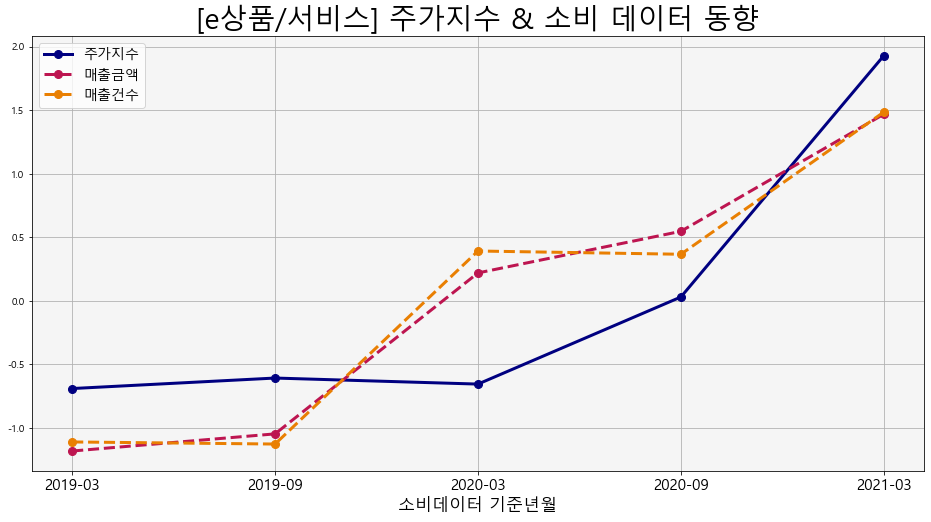

In [ ]:
X = df_MC_Nscaled['index']
fig, ax = plt.subplots(figsize = (16, 8))
l1, = ax.plot(X, df_MC_Nscaled['주가지수'], '-o', color = 'navy', linewidth = 3, markersize= 8)
l2, = ax.plot(X, df_MC_Nscaled['매출금액'], '--o', color ='#bd1550', alpha = 1, linewidth = 3, markersize= 8)
l3, = ax.plot(X, df_MC_Nscaled['매출건수'], '--o', color = '#e97f02', alpha = 1, linewidth = 3, markersize= 8)
ax.legend(handles = (l1, l2, l3), labels = ['주가지수', '매출금액', '매출건수'], fontsize = 14)
ax.set_title('[e상품/서비스] 주가지수 & 소비 데이터 동향', fontsize = 28)
ax.set_facecolor('whitesmoke')
ax.grid(True)
plt.xticks(fontsize = 15)
plt.xlabel('소비데이터 기준년월', fontsize = 17)
plt.show()

In [ ]:
path = 'C:/Users/dudtj/OneDrive/Desktop/python/금융데이터/KRX 엑셀문서/전종목 시세/'
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith('.csv')]
file_list_py

df = pd.DataFrame()
Timeindex = pd.date_range('9/1/2018', periods= len(file_list_py), freq = 'M')
for i, time in zip(file_list_py,Timeindex):
    data = pd.read_csv(path + i, encoding= 'cp949')
    data_df = pd.DataFrame(data)
    data_df['기준년월'] = time
    df = pd.concat([df, data])
 
df_MC = df.reset_index(drop=True)

xlsx = pd.ExcelFile('C:/Users/dudtj/OneDrive/Desktop/python/금융데이터/관련종목.xlsx')
inv_category_F = pd.read_excel(xlsx, sheet_name = '여가-스포츠')
category_list_F = inv_category_F['종목명'].tolist()
category_df_list = []
for i in range(len(category_list_F)):
     category_df_list.append(get_category(category_list_F[i], df_MC))

df = pd.DataFrame(index = Timeindex)
df.index.names = ['기준년월']
cri_9_1_df = pd.read_csv('C:/Users/dudtj/OneDrive/Desktop/python/금융데이터/KRX 엑셀문서/18.09.03.csv', encoding='cp949')

df_list = []
for i in range(len(category_list_F)):
     if category_list_F[i] in cri_9_1_df['종목명'].tolist():
          df_list.append(get_category_2(category_list_F[i], cri_9_1_df))
     else: 
          pass
    
df_MC_list = []
for i in range(len(df_list)):
    df_MC_list.append(df_list[i]['시가총액'])

cri_MC_9_1 = np.array(df_MC_list).sum()

MC_list = []
for i in range(len(category_df_list)):
    MC_list.append(get_category_3(category_df_list[i]))

from functools import reduce
df_merge = reduce(lambda left, right : pd.merge(left, right, on = '기준년월', how = 'outer'), MC_list)
df_merge.fillna(0, inplace= True)
df_merge  =df_merge/100000000
df_merge.columns = range(len(df_merge.columns))
alpha = []
list1 = []
for i in np.arange(1,35):
    if 0 in df_merge.iloc[i-1, :].tolist():
        A = df_merge.iloc[i, :].sum()
        zero_list = df_merge.iloc[i-1,:][df_merge.iloc[i-1, : ] == 0].index.tolist()
        for j in range(len(zero_list)):
            alpha.append(df_merge.iloc[i,zero_list[j]])
        alpha_sum = np.array(alpha).sum()
        list1.append(df_merge.iloc[i, :].sum()/(cri_MC_9_1 + alpha_sum/A))
    elif 0 not in df_merge.iloc[i-1, :].tolist():
        list1.append(df_merge.iloc[i, :].sum()/cri_MC_9_1)

list1.insert(0, df_merge.iloc[0, :].sum()/cri_MC_9_1)
Timeindex_shift = pd.date_range('8/1/2018', periods= len(file_list_py), freq = 'M')
df = pd.DataFrame(list1, index = Timeindex_shift)
df.reset_index(inplace=True)
df.columns = ['index', '주가지수']
df

index          주가지수
0  2018-08-31  1.051250e-08
1  2018-09-30  8.876587e-09
2  2018-10-31  9.784052e-09
3  2018-11-30  9.598771e-09
4  2018-12-31  9.968895e-09
5  2019-01-31  1.003798e-08
6  2019-02-28  9.755705e-09
7  2019-03-31  1.052070e-08
8  2019-04-30  9.767105e-09
9  2019-05-31  9.869570e-09
10 2019-06-30  9.200012e-09
11 2019-07-31  9.090730e-09
12 2019-08-31  9.204913e-09
13 2019-09-30  9.283170e-09
14 2019-10-31  9.531735e-09
15 2019-11-30  9.771634e-09
16 2019-12-31  9.861714e-09
17 2020-01-31  9.650086e-09
18 2020-02-29  8.257995e-09
19 2020-03-31  1.001508e-08
20 2020-04-30  1.128556e-08
21 2020-05-31  1.104194e-08
22 2020-06-30  1.237999e-08
23 2020-07-31  1.328490e-08
24 2020-08-31  1.289330e-08
25 2020-09-30  1.252583e-08
26 2020-10-31  1.432508e-08
27 2020-11-30  1.550456e-08
28 2020-12-31  1.699740e-08
29 2021-01-31  1.730577e-08
30 2021-02-28  1.813464e-08
31 2021-03-31  1.985206e-08
32 2021-04-30  2.130940e-08
33 2021-05-31  2.400497e-08
34 2021-06-30  2.318099e-08

In [ ]:
data = pd.read_csv(r'C:\Users\dudtj\OneDrive\Desktop\python\금융데이터\금융보안원_경진대회_데이터(최종제출)1.csv',encoding='euc-kr')
data = data[data['품목대분류명'] == '여가/스포츠']
grouped_M = pd.DataFrame(data['매출금액'].groupby(data['기준년월']).sum())
grouped_C = pd.DataFrame(data['매출건수'].groupby(data['기준년월']).sum())
data_merge = pd.merge(grouped_M, grouped_C, on = '기준년월')
data_merge

매출금액    매출건수
기준년월                       
201903  31465627464  490284
201909  33379954820  485056
202003  23146161507  413706
202009  27370537941  471876
202103  33332419725  528049

In [ ]:
col_list = ['성별', '연령', '가구생애주기', '고객소재지_광역시도']
params_list = []
for cat in col_list:
    values_list = data[cat].unique().tolist()
    for  i in range(len(values_list)):
        params = [data, cat, values_list[i]]
        params_list.append(params)

dfmerge_list_M = []
for param in params_list:
    dfmerge_list_M.append(get_grouped(param[0], param[1], param[2], '매출금액'))

df_merge_M = reduce(lambda left, right : pd.merge(left, right, on = '기준년월', how = 'outer'), dfmerge_list_M)

merge_list = [data_merge, df_merge_M]
df_merge_all = reduce(lambda left, right : pd.merge(left, right, on = '기준년월', how = 'outer'), merge_list)
Timeindex = pd.date_range('2019.03', periods= 5, freq= '6M')
df_merge_all.index = Timeindex
df_merge_all.reset_index(inplace=True)
df_merge_all_M = pd.merge(df_merge_all, df, on = 'index', how = 'inner')
df_merge_all_M

index         매출금액    매출건수      매출금액_남성      매출금액_여성     매출금액_40대  \
0 2019-03-31  31465627464  490284  13443025255  18022602209  11253275621   
1 2019-09-30  33379954820  485056  14154540330  19225414490   9095703026   
2 2020-03-31  23146161507  413706   9555558187  13590603320   6390458765   
3 2020-09-30  27370537941  471876  12678967922  14691570019   8607691866   
4 2021-03-31  33332419725  528049  13945401593  19387018132  10263361542   

      매출금액_30대    매출금액_20대    매출금액_50대  매출금액_60대 이상  매출금액_20세 미만  \
0  12169937237  4574012787  2966321504    500472891      1607424   
1  11616794338  8225699201  3462413288    815735358    163609609   
2   7534026676  5812331079  2737785935    615921671     55637381   
3   7547067147  5924649097  4336650681    820612487    133866663   
4  10556111056  6908286198  4451308346   1088903467     64449116   

   매출금액_신혼영유아가구  매출금액_초중고자녀가구   매출금액_1인가구  매출금액_성인자녀가구   매출금액_노인가구  \
0   13560822996    9463069988  4858182553   3083079036   500472891   
1   12577881734    7704161449  8711874962   3570301317   815735358   
2    8108982877    5382469754  6176621290   2862165915   615921671   
3    8274336809    7493591704  6337186820   4444810121   820612487   
4   11564597813    8199484520  8335692853   4143741072  1088903467   

    매출금액_서울특별시    매출금액_경기도  매출금액_인천광역시          주가지수  
0  19931767301  7204703098  4329157065  1.052070e-08  
1  21719570491  7846463086  3813921243  9.283170e-09  
2  14995284994  5346981380  2803895133  1.001508e-08  
3  17910228220  6195605825  3264703896  1.252583e-08  
4  21619817616  7568518992  4144083117  1.985206e-08

In [ ]:
from sklearn.preprocessing import StandardScaler

df_MC_N = df_merge_all_M[['index', '매출금액', '매출건수', '주가지수']]
df_MC_N.set_index('index', inplace= True)
scaler = StandardScaler()
Timeindex = pd.date_range('2019.03', periods= 5, freq= '6M')
MC_N_scaled = scaler.fit_transform(df_MC_N[['매출금액', '매출건수', '주가지수']])
df_MC_Nscaled = pd.DataFrame(MC_N_scaled, columns= ['매출금액', '매출건수', '주가지수'], index = Timeindex)
df_MC_Nscaled.reset_index(inplace=True)
df_MC_Nscaled['index'] = df_MC_Nscaled['index'].astype(str).str[:-3]
df_MC_Nscaled

index      매출금액      매출건수      주가지수
0  2019-03  0.436540  0.336786 -0.497139
1  2019-09  0.920519  0.195813 -0.817792
2  2020-03 -1.666783 -1.728130 -0.628148
3  2020-09 -0.598778 -0.159583  0.022403
4  2021-03  0.908502  1.355114  1.920676

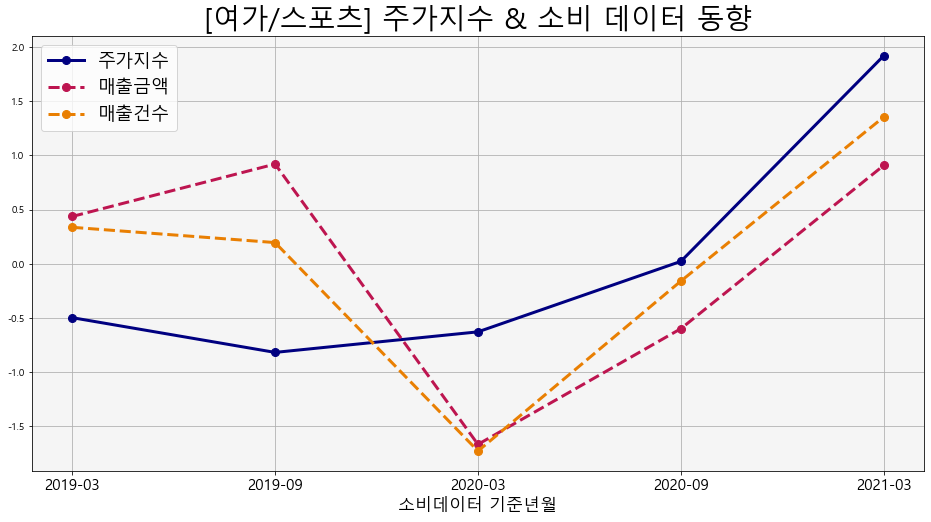

In [ ]:
X = df_MC_Nscaled['index']
fig, ax = plt.subplots(figsize = (16, 8))
l1, = ax.plot(X, df_MC_Nscaled['주가지수'], '-o', color = 'navy', linewidth = 3,  markersize= 8,)
l2, = ax.plot(X, df_MC_Nscaled['매출금액'], '--o', color ='#bd1550', alpha = 1, linewidth = 3,  markersize= 8)
l3, = ax.plot(X, df_MC_Nscaled['매출건수'], '--o', color = '#e97f02', alpha = 1, linewidth = 3,  markersize= 8)
ax.legend(handles = (l1, l2, l3), labels = ['주가지수', '매출금액', '매출건수'], fontsize = 18)
ax.set_title('[여가/스포츠] 주가지수 & 소비 데이터 동향', fontsize = 28)
ax.set_facecolor('whitesmoke')
ax.grid(True)
plt.xticks(fontsize = 15)
plt.xlabel('소비데이터 기준년월', fontsize = 17)
plt.show()

In [ ]:
path = 'C:/Users/dudtj/OneDrive/Desktop/python/금융데이터/KRX 엑셀문서/전종목 시세/'
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith('.csv')]
file_list_py

df = pd.DataFrame()
Timeindex = pd.date_range('9/1/2018', periods= len(file_list_py), freq = 'M')
for i, time in zip(file_list_py,Timeindex):
    data = pd.read_csv(path + i, encoding= 'cp949')
    data_df = pd.DataFrame(data)
    data_df['기준년월'] = time
    df = pd.concat([df, data])
 
df_MC = df.reset_index(drop=True)

xlsx = pd.ExcelFile('C:/Users/dudtj/OneDrive/Desktop/python/금융데이터/관련종목.xlsx')
inv_category_F = pd.read_excel(xlsx, sheet_name = '전자')
category_list_F = inv_category_F['종목명'].tolist()
category_df_list = []
for i in range(len(category_list_F)):
     category_df_list.append(get_category(category_list_F[i], df_MC))

df = pd.DataFrame(index = Timeindex)
df.index.names = ['기준년월']
cri_9_1_df = pd.read_csv('C:/Users/dudtj/OneDrive/Desktop/python/금융데이터/KRX 엑셀문서/18.09.03.csv', encoding='cp949')

df_list = []
for i in range(len(category_list_F)):
     if category_list_F[i] in cri_9_1_df['종목명'].tolist():
          df_list.append(get_category_2(category_list_F[i], cri_9_1_df))
     else: 
          pass
    
df_MC_list = []
for i in range(len(df_list)):
    df_MC_list.append(df_list[i]['시가총액'])

cri_MC_9_1 = np.array(df_MC_list).sum()

MC_list = []
for i in range(len(category_df_list)):
    MC_list.append(get_category_3(category_df_list[i]))

from functools import reduce
df_merge = reduce(lambda left, right : pd.merge(left, right, on = '기준년월', how = 'outer'), MC_list)
df_merge.fillna(0, inplace= True)
df_merge  =df_merge/100000000
df_merge.columns = range(len(df_merge.columns))
alpha = []
list1 = []
for i in np.arange(1,35):
    if 0 in df_merge.iloc[i-1, :].tolist():
        A = df_merge.iloc[i, :].sum()
        zero_list = df_merge.iloc[i-1,:][df_merge.iloc[i-1, : ] == 0].index.tolist()
        for j in range(len(zero_list)):
            alpha.append(df_merge.iloc[i,zero_list[j]])
        alpha_sum = np.array(alpha).sum()
        list1.append(df_merge.iloc[i, :].sum()/(cri_MC_9_1 + alpha_sum/A))
    elif 0 not in df_merge.iloc[i-1, :].tolist():
        list1.append(df_merge.iloc[i, :].sum()/cri_MC_9_1)

list1.insert(0, df_merge.iloc[0, :].sum()/cri_MC_9_1)
Timeindex_shift = pd.date_range('8/1/2018', periods= len(file_list_py), freq = 'M')
df = pd.DataFrame(list1, index = Timeindex_shift)
df.reset_index(inplace=True)
df.columns = ['index', '주가지수']
df

index          주가지수
0  2018-08-31  9.655926e-09
1  2018-09-30  8.741768e-09
2  2018-10-31  8.640151e-09
3  2018-11-30  7.682786e-09
4  2018-12-31  8.924130e-09
5  2019-01-31  8.875111e-09
6  2019-02-28  8.858216e-09
7  2019-03-31  9.033346e-09
8  2019-04-30  8.277235e-09
9  2019-05-31  8.989421e-09
10 2019-06-30  8.751290e-09
11 2019-07-31  8.577420e-09
12 2019-08-31  9.242023e-09
13 2019-09-30  9.490943e-09
14 2019-10-31  9.462610e-09
15 2019-11-30  1.048734e-08
16 2019-12-31  1.060576e-08
17 2020-01-31  1.028153e-08
18 2020-02-29  8.979210e-09
19 2020-03-31  9.648908e-09
20 2020-04-30  9.987325e-09
21 2020-05-31  1.054987e-08
22 2020-06-30  1.152699e-08
23 2020-07-31  1.127982e-08
24 2020-08-31  1.184572e-08
25 2020-09-30  1.144544e-08
26 2020-10-31  1.355066e-08
27 2020-11-30  1.616480e-08
28 2020-12-31  1.673527e-08
29 2021-01-31  1.688605e-08
30 2021-02-28  1.667673e-08
31 2021-03-31  1.693358e-08
32 2021-04-30  1.656572e-08
33 2021-05-31  1.694750e-08
34 2021-06-30  1.661955e-08

In [ ]:
data = pd.read_csv(r'C:\Users\dudtj\OneDrive\Desktop\python\금융데이터\금융보안원_경진대회_데이터(최종제출)1.csv',encoding='euc-kr')
data = data[data['품목대분류명'] == '전자']
grouped_M = pd.DataFrame(data['매출금액'].groupby(data['기준년월']).sum())
grouped_C = pd.DataFrame(data['매출건수'].groupby(data['기준년월']).sum())
data_merge = pd.merge(grouped_M, grouped_C, on = '기준년월')
data_merge

매출금액    매출건수
기준년월                       
201903  17594786683  190838
201909  14864182506  175082
202003  19465849742  208306
202009  19927105222  179644
202103  20845438446  206078

In [ ]:
col_list = ['성별', '연령', '가구생애주기', '고객소재지_광역시도']
params_list = []
for cat in col_list:
    values_list = data[cat].unique().tolist()
    for  i in range(len(values_list)):
        params = [data, cat, values_list[i]]
        params_list.append(params)

dfmerge_list_M = []
for param in params_list:
    dfmerge_list_M.append(get_grouped(param[0], param[1], param[2], '매출금액'))

df_merge_M = reduce(lambda left, right : pd.merge(left, right, on = '기준년월', how = 'outer'), dfmerge_list_M)

merge_list = [data_merge, df_merge_M]
df_merge_all = reduce(lambda left, right : pd.merge(left, right, on = '기준년월', how = 'outer'), merge_list)
Timeindex = pd.date_range('2019.03', periods= 5, freq= '6M')
df_merge_all.index = Timeindex
df_merge_all.reset_index(inplace=True)
df_merge_all_M = pd.merge(df_merge_all, df, on = 'index', how = 'inner')
df_merge_all_M

index         매출금액    매출건수      매출금액_여성     매출금액_남성    매출금액_20대  \
0 2019-03-31  17594786683  190838   9371448163  8223338520  1882047535   
1 2019-09-30  14864182506  175082   7966531247  6897651259  3387006114   
2 2020-03-31  19465849742  208306  11033506723  8432343019  3901301786   
3 2020-09-30  19927105222  179644  10633970698  9293134524  2614060489   
4 2021-03-31  20845438446  206078  11575253112  9270185334  3729291278   

     매출금액_40대    매출금액_30대    매출금액_50대  매출금액_20세 미만  매출금액_60대 이상   매출금액_1인가구  \
0  5848943875  7645876297  1874930247       495194    342493535  2061551258   
1  4007864684  5565325240  1549699597     71233010    283053861  3625959060   
2  5778574172  6868061402  2371484213     53323827    493104342  4300736938   
3  6727658182  6209023453  3326349327     28767902   1021245869  2920568570   
4  6522446761  6643320618  3094547474     66596352    789235963  4573071940   

   매출금액_신혼영유아가구  매출금액_초중고자녀가구  매출금액_성인자녀가구   매출금액_노인가구   매출금액_서울특별시  \
0    8277289190    4957903093   1955549607   342493535  10910859237   
1    5985617647    3312045991   1657505947   283053861   9308584857   
2    7494999191    4638937555   2538071716   493104342  12407792182   
3    6694301754    5794427323   3496561706  1021245869  12784884092   
4    7368868342    5192986162   2921276039   789235963  13097915960   

     매출금액_경기도  매출금액_인천광역시          주가지수  
0  4321815786  2362111660  9.033346e-09  
1  3568154087  1987443562  9.490943e-09  
2  4598143957  2459913603  9.648908e-09  
3  4445607120  2696614010  1.144544e-08  
4  4815399861  2932122625  1.693358e-08

In [ ]:
from sklearn.preprocessing import StandardScaler

df_MC_N = df_merge_all_M[['index', '매출금액', '매출건수', '주가지수']]
df_MC_N.set_index('index', inplace= True)
scaler = StandardScaler()
Timeindex = pd.date_range('2019.03', periods= 5, freq= '6M')
MC_N_scaled = scaler.fit_transform(df_MC_N[['매출금액', '매출건수', '주가지수']])
df_MC_Nscaled = pd.DataFrame(MC_N_scaled, columns= ['매출금액', '매출건수', '주가지수'], index = Timeindex)
df_MC_Nscaled.reset_index(inplace=True)
df_MC_Nscaled['index'] = df_MC_Nscaled['index'].astype(str).str[:-3]
df_MC_Nscaled

index      매출금액      매출건수      주가지수
0  2019-03 -0.445316 -0.085630 -0.777439
1  2019-09 -1.732496 -1.257208 -0.621208
2  2020-03  0.436685  1.213248 -0.567276
3  2020-09  0.654116 -0.917989  0.046090
4  2021-03  1.087010  1.047579  1.919834

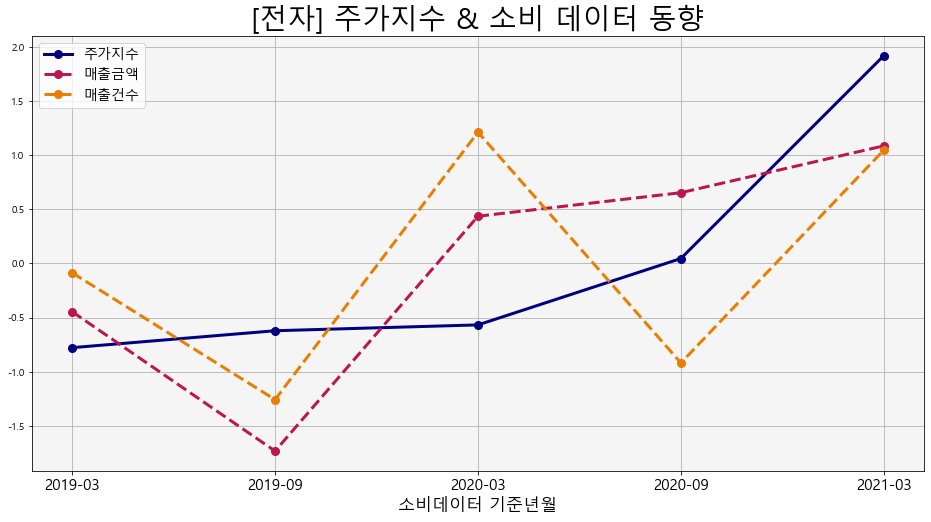

In [ ]:
X = df_MC_Nscaled['index']
fig, ax = plt.subplots(figsize = (16, 8))
l1, = ax.plot(X, df_MC_Nscaled['주가지수'], '-o', color = 'navy', linewidth = 3,  markersize= 8)
l2, = ax.plot(X, df_MC_Nscaled['매출금액'], '--o', color ='#bd1550', alpha = 1, linewidth = 3,  markersize= 8)
l3, = ax.plot(X, df_MC_Nscaled['매출건수'], '--o', color = '#e97f02', alpha = 1, linewidth = 3,  markersize= 8)
ax.legend(handles = (l1, l2, l3), labels = ['주가지수', '매출금액', '매출건수'], fontsize = 14)
ax.set_title('[전자] 주가지수 & 소비 데이터 동향', fontsize = 28)
ax.set_facecolor('whitesmoke')
ax.grid(True)
plt.xticks(fontsize = 15)
plt.xlabel('소비데이터 기준년월', fontsize = 17)
plt.show()

In [ ]:
path = 'C:/Users/dudtj/OneDrive/Desktop/python/금융데이터/KRX 엑셀문서/전종목 시세/'
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith('.csv')]
file_list_py

df = pd.DataFrame()
Timeindex = pd.date_range('9/1/2018', periods= len(file_list_py), freq = 'M')
for i, time in zip(file_list_py,Timeindex):
    data = pd.read_csv(path + i, encoding= 'cp949')
    data_df = pd.DataFrame(data)
    data_df['기준년월'] = time
    df = pd.concat([df, data])
 
df_MC = df.reset_index(drop=True)

xlsx = pd.ExcelFile('C:/Users/dudtj/OneDrive/Desktop/python/금융데이터/관련종목.xlsx')
inv_category_F = pd.read_excel(xlsx, sheet_name = 'e상품-서비스')
category_list_F = inv_category_F['종목명'].tolist()
category_df_list = []
for i in range(len(category_list_F)):
     category_df_list.append(get_category(category_list_F[i], df_MC))

df = pd.DataFrame(index = Timeindex)
df.index.names = ['기준년월']
cri_9_1_df = pd.read_csv('C:/Users/dudtj/OneDrive/Desktop/python/금융데이터/KRX 엑셀문서/18.09.03.csv', encoding='cp949')

df_list = []
for i in range(len(category_list_F)):
     if category_list_F[i] in cri_9_1_df['종목명'].tolist():
          df_list.append(get_category_2(category_list_F[i], cri_9_1_df))
     else: 
          pass
    
df_MC_list = []
for i in range(len(df_list)):
    df_MC_list.append(df_list[i]['시가총액'])

cri_MC_9_1 = np.array(df_MC_list).sum()

MC_list = []
for i in range(len(category_df_list)):
    MC_list.append(get_category_3(category_df_list[i]))

from functools import reduce
df_merge = reduce(lambda left, right : pd.merge(left, right, on = '기준년월', how = 'outer'), MC_list)
df_merge.fillna(0, inplace= True)
df_merge  =df_merge/100000000
df_merge.columns = range(len(df_merge.columns))
alpha = []
list1 = []
for i in np.arange(1,35):
    if 0 in df_merge.iloc[i-1, :].tolist():
        A = df_merge.iloc[i, :].sum()
        zero_list = df_merge.iloc[i-1,:][df_merge.iloc[i-1, : ] == 0].index.tolist()
        for j in range(len(zero_list)):
            alpha.append(df_merge.iloc[i,zero_list[j]])
        alpha_sum = np.array(alpha).sum()
        list1.append(df_merge.iloc[i, :].sum()/(cri_MC_9_1 + alpha_sum/A))
    elif 0 not in df_merge.iloc[i-1, :].tolist():
        list1.append(df_merge.iloc[i, :].sum()/cri_MC_9_1)

list1.insert(0, df_merge.iloc[0, :].sum()/cri_MC_9_1)
Timeindex_shift = pd.date_range('9/1/2018', periods= len(file_list_py), freq = 'M')
df = pd.DataFrame(list1, index = Timeindex_shift)
df.reset_index(inplace=True)
df.columns = ['index', 'e상품_주가지수']
df_e = df

In [ ]:
path = 'C:/Users/dudtj/OneDrive/Desktop/python/금융데이터/KRX 엑셀문서/전종목 시세/'
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith('.csv')]
file_list_py

df = pd.DataFrame()
Timeindex = pd.date_range('9/1/2018', periods= len(file_list_py), freq = 'M')
for i, time in zip(file_list_py,Timeindex):
    data = pd.read_csv(path + i, encoding= 'cp949')
    data_df = pd.DataFrame(data)
    data_df['기준년월'] = time
    df = pd.concat([df, data])
 
df_MC = df.reset_index(drop=True)

xlsx = pd.ExcelFile('C:/Users/dudtj/OneDrive/Desktop/python/금융데이터/관련종목.xlsx')
inv_category_F = pd.read_excel(xlsx, sheet_name = '식품')
category_list_F = inv_category_F['종목명'].tolist()
category_df_list = []
for i in range(len(category_list_F)):
     category_df_list.append(get_category(category_list_F[i], df_MC))

df = pd.DataFrame(index = Timeindex)
df.index.names = ['기준년월']
cri_9_1_df = pd.read_csv('C:/Users/dudtj/OneDrive/Desktop/python/금융데이터/KRX 엑셀문서/18.09.03.csv', encoding='cp949')
df_list = []
for i in range(len(category_list_F)):
     if category_list_F[i] in cri_9_1_df['종목명'].tolist():
          df_list.append(get_category_2(category_list_F[i], cri_9_1_df))
     else: 
          pass
    
df_MC_list = []
for i in range(len(df_list)):
    df_MC_list.append(df_list[i]['시가총액'])

cri_MC_9_1 = np.array(df_MC_list).sum()

MC_list = []
for i in range(len(category_df_list)):
    MC_list.append(get_category_3(category_df_list[i]))

from functools import reduce
df_merge = reduce(lambda left, right : pd.merge(left, right, on = '기준년월', how = 'outer'), MC_list)
df_merge.fillna(0, inplace= True)
df_merge  =df_merge/100000000
df_merge.columns = range(len(df_merge.columns))
alpha = []
list1 = []
for i in np.arange(1,35):
    if 0 in df_merge.iloc[i-1, :].tolist():
        A = df_merge.iloc[i, :].sum()
        zero_list = df_merge.iloc[i-1,:][df_merge.iloc[i-1, : ] == 0].index.tolist()
        for j in range(len(zero_list)):
            alpha.append(df_merge.iloc[i,zero_list[j]])
        alpha_sum = np.array(alpha).sum()
        list1.append(df_merge.iloc[i, :].sum()/(cri_MC_9_1 + alpha_sum/A))
    elif 0 not in df_merge.iloc[i-1, :].tolist():
        list1.append(df_merge.iloc[i, :].sum()/cri_MC_9_1)

list1.insert(0, df_merge.iloc[0, :].sum()/cri_MC_9_1)
Timeindex_shift = pd.date_range('9/1/2018', periods= len(file_list_py), freq = 'M')
df = pd.DataFrame(list1, index = Timeindex_shift)
df.reset_index(inplace=True)
df.columns = ['index', '식품_주가지수']
df_f = df

In [ ]:
path = 'C:/Users/dudtj/OneDrive/Desktop/python/금융데이터/KRX 엑셀문서/전종목 시세/'
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith('.csv')]
file_list_py

df = pd.DataFrame()
Timeindex = pd.date_range('9/1/2018', periods= len(file_list_py), freq = 'M')
for i, time in zip(file_list_py,Timeindex):
    data = pd.read_csv(path + i, encoding= 'cp949')
    data_df = pd.DataFrame(data)
    data_df['기준년월'] = time
    df = pd.concat([df, data])
 
df_MC = df.reset_index(drop=True)

xlsx = pd.ExcelFile('C:/Users/dudtj/OneDrive/Desktop/python/금융데이터/관련종목.xlsx')
inv_category_F = pd.read_excel(xlsx, sheet_name = '전자')
category_list_F = inv_category_F['종목명'].tolist()
category_df_list = []
for i in range(len(category_list_F)):
     category_df_list.append(get_category(category_list_F[i], df_MC))

df = pd.DataFrame(index = Timeindex)
df.index.names = ['기준년월']
cri_9_1_df = pd.read_csv('C:/Users/dudtj/OneDrive/Desktop/python/금융데이터/KRX 엑셀문서/18.09.03.csv', encoding='cp949')
df_list = []
for i in range(len(category_list_F)):
     if category_list_F[i] in cri_9_1_df['종목명'].tolist():
          df_list.append(get_category_2(category_list_F[i], cri_9_1_df))
     else: 
          pass
    
df_MC_list = []
for i in range(len(df_list)):
    df_MC_list.append(df_list[i]['시가총액'])

cri_MC_9_1 = np.array(df_MC_list).sum()

MC_list = []
for i in range(len(category_df_list)):
    MC_list.append(get_category_3(category_df_list[i]))

from functools import reduce
df_merge = reduce(lambda left, right : pd.merge(left, right, on = '기준년월', how = 'outer'), MC_list)
df_merge.fillna(0, inplace= True)
df_merge  =df_merge/100000000
df_merge.columns = range(len(df_merge.columns))
alpha = []
list1 = []
for i in np.arange(1,35):
    if 0 in df_merge.iloc[i-1, :].tolist():
        A = df_merge.iloc[i, :].sum()
        zero_list = df_merge.iloc[i-1,:][df_merge.iloc[i-1, : ] == 0].index.tolist()
        for j in range(len(zero_list)):
            alpha.append(df_merge.iloc[i,zero_list[j]])
        alpha_sum = np.array(alpha).sum()
        list1.append(df_merge.iloc[i, :].sum()/(cri_MC_9_1 + alpha_sum/A))
    elif 0 not in df_merge.iloc[i-1, :].tolist():
        list1.append(df_merge.iloc[i, :].sum()/cri_MC_9_1)

list1.insert(0, df_merge.iloc[0, :].sum()/cri_MC_9_1)
Timeindex_shift = pd.date_range('9/1/2018', periods= len(file_list_py), freq = 'M')
df = pd.DataFrame(list1, index = Timeindex_shift)
df.reset_index(inplace=True)
df.columns = ['index', '전자_주가지수']
df_j = df

In [ ]:
path = 'C:/Users/dudtj/OneDrive/Desktop/python/금융데이터/KRX 엑셀문서/전종목 시세/'
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith('.csv')]
file_list_py

df = pd.DataFrame()
Timeindex = pd.date_range('9/1/2018', periods= len(file_list_py), freq = 'M')
for i, time in zip(file_list_py,Timeindex):
    data = pd.read_csv(path + i, encoding= 'cp949')
    data_df = pd.DataFrame(data)
    data_df['기준년월'] = time
    df = pd.concat([df, data])
 
df_MC = df.reset_index(drop=True)

xlsx = pd.ExcelFile('C:/Users/dudtj/OneDrive/Desktop/python/금융데이터/관련종목.xlsx')
inv_category_F = pd.read_excel(xlsx, sheet_name = '여가-스포츠')
category_list_F = inv_category_F['종목명'].tolist()
category_df_list = []
for i in range(len(category_list_F)):
     category_df_list.append(get_category(category_list_F[i], df_MC))

df = pd.DataFrame(index = Timeindex)
df.index.names = ['기준년월']
cri_9_1_df = pd.read_csv('C:/Users/dudtj/OneDrive/Desktop/python/금융데이터/KRX 엑셀문서/18.09.03.csv', encoding='cp949')
df_list = []
for i in range(len(category_list_F)):
     if category_list_F[i] in cri_9_1_df['종목명'].tolist():
          df_list.append(get_category_2(category_list_F[i], cri_9_1_df))
     else: 
          pass
    
df_MC_list = []
for i in range(len(df_list)):
    df_MC_list.append(df_list[i]['시가총액'])

cri_MC_9_1 = np.array(df_MC_list).sum()

MC_list = []
for i in range(len(category_df_list)):
    MC_list.append(get_category_3(category_df_list[i]))

from functools import reduce
df_merge = reduce(lambda left, right : pd.merge(left, right, on = '기준년월', how = 'outer'), MC_list)
df_merge.fillna(0, inplace= True)
df_merge  =df_merge/100000000
df_merge.columns = range(len(df_merge.columns))
alpha = []
list1 = []
for i in np.arange(1,35):
    if 0 in df_merge.iloc[i-1, :].tolist():
        A = df_merge.iloc[i, :].sum()
        zero_list = df_merge.iloc[i-1,:][df_merge.iloc[i-1, : ] == 0].index.tolist()
        for j in range(len(zero_list)):
            alpha.append(df_merge.iloc[i,zero_list[j]])
        alpha_sum = np.array(alpha).sum()
        list1.append(df_merge.iloc[i, :].sum()/(cri_MC_9_1 + alpha_sum/A))
    elif 0 not in df_merge.iloc[i-1, :].tolist():
        list1.append(df_merge.iloc[i, :].sum()/cri_MC_9_1)

list1.insert(0, df_merge.iloc[0, :].sum()/cri_MC_9_1)
Timeindex_shift = pd.date_range('9/1/2018', periods= len(file_list_py), freq = 'M')
df = pd.DataFrame(list1, index = Timeindex_shift)
df.reset_index(inplace=True)
df.columns = ['index', '여가_주가지수']
df_s = df

In [ ]:
merge_list = [df_e, df_f, df_j, df_s]
merge_N = reduce(lambda left, right : pd.merge(left, right, on = 'index', how = 'inner'), merge_list)
merge_N.set_index('index', inplace =True)
for col in merge_N.columns:
    merge_N[col] = merge_N[col]*(10**9)
merge_N

e상품_주가지수    식품_주가지수    전자_주가지수    여가_주가지수
index                                                 
2018-09-30   9.939810  10.266368   9.655926  10.512499
2018-10-31   8.903420   8.740130   8.741768   8.876587
2018-11-30   9.135718   9.558351   8.640151   9.784052
2018-12-31   8.310728   9.360772   7.682786   9.598771
2019-01-31   9.261898   9.967054   8.924130   9.968895
2019-02-28   9.359291   9.933799   8.875111  10.037984
2019-03-31   9.319194  10.289986   8.858216   9.755705
2019-04-30   9.597818  10.379016   9.033346  10.520704
2019-05-31   8.904751   9.440447   8.277235   9.767105
2019-06-30   9.487784   9.587350   8.989421   9.869570
2019-07-31   9.203185   8.871834   8.751290   9.200012
2019-08-31   9.033883   8.427215   8.577420   9.090730
2019-09-30   9.649852   9.040034   9.242023   9.204913
2019-10-31   9.806813   8.910696   9.490943   9.283170
2019-11-30   9.848991   8.900058   9.462610   9.531735
2019-12-31  10.626459   9.043148  10.487344   9.771634
2020-01-31  10.611753   8.588536  10.605764   9.861714
2020-02-29  10.103351   8.147667  10.281531   9.650086
2020-03-31   8.964404   7.464756   8.979210   8.257995
2020-04-30   9.686582   9.178237   9.648908  10.015084
2020-05-31  10.226969   9.448548   9.987325  11.285558
2020-06-30  10.630578   9.482416  10.549872  11.041944
2020-07-31  11.417242   9.751770  11.526989  12.379990
2020-08-31  11.478806  10.082531  11.279823  13.284900
2020-09-30  11.942009   9.785321  11.845716  12.893297
2020-10-31  11.420118   9.512525  11.445439  12.525833
2020-11-30  12.994917  10.106883  13.550659  14.325079
2020-12-31  15.109849  10.585387  16.164800  15.504555
2021-01-31  15.883546  10.391885  16.735274  16.997400
2021-02-28  16.261369  10.561774  16.886047  17.305767
2021-03-31  16.164863  10.915006  16.676732  18.134644
2021-04-30  16.223274  11.167708  16.933578  19.852056
2021-05-31  16.308911  11.965062  16.565722  21.309403
2021-06-30  16.953851  12.431707  16.947497  24.004975
2021-07-31  16.447282  11.747658  16.619554  23.180992

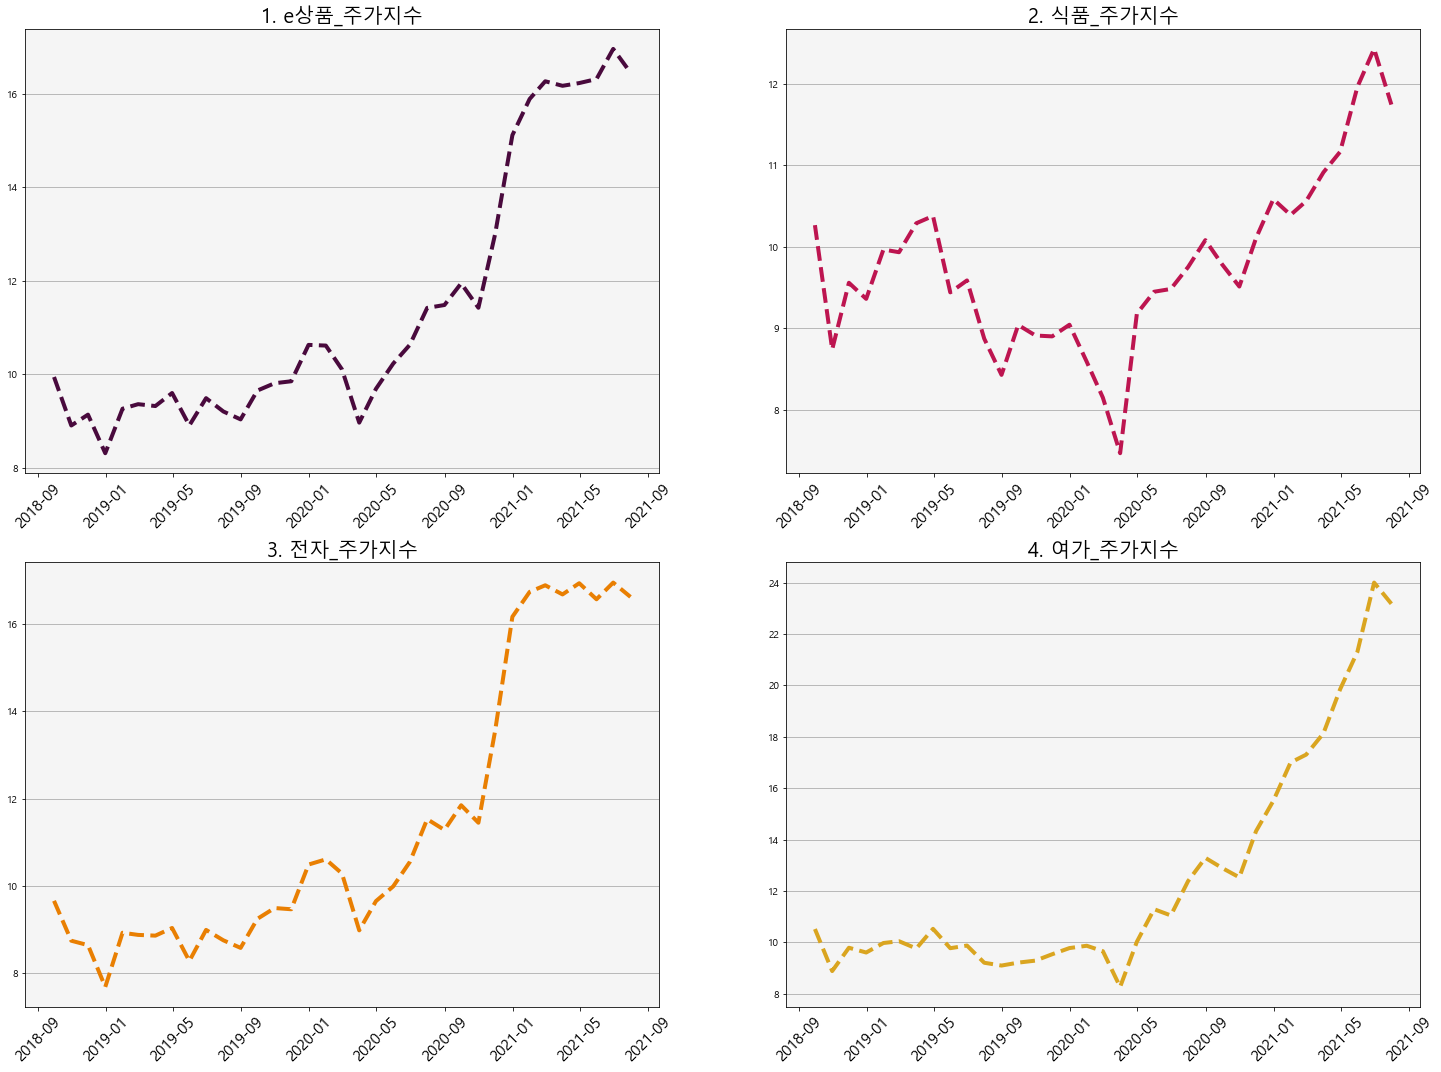

In [ ]:
import warnings
warnings.filterwarnings('ignore')


fig, axs = plt.subplots(figsize = (25, 18), ncols= 2, nrows= 2)
col_list = [merge_N.columns]
color_list = ['#490a3d', '#bd1550', '#e97f02' ,'goldenrod']
range_list = range(len(col_list[0]))
for i, feature, color in zip(range_list, col_list[0], color_list):
    row = int(i/2)
    col = i%2
    axs[row][col].plot(merge_N[feature], '--', color = color, linewidth = 4)
    axs[row][col].set_title("{0}. {1}".format(i+1,feature), fontsize = 20)
    axs[row][col].set_facecolor('whitesmoke')
    axs[row][col].grid(True, axis = 'y', color = 'black', alpha = 0.3)
    axs[row][col].tick_params(axis = 'x', labelsize = 15, labelcolor = 'black', rotation = 45)
    

## e상품/서비스 주가지수&소비데이터 상관분석

### 주가지수와 소비자심리지수, 코로나 확진자 수 등등 상관분석

In [ ]:
data = pd.read_csv(r'C:\Users\dudtj\OneDrive\Desktop\python\금융데이터\금융보안원_경진대회_데이터(최종제출)1.csv',encoding='euc-kr')
df2 = pd.read_excel('C:/Users/dudtj/OneDrive/Desktop/python/금융데이터/소비지수/소비평가지수.xlsx')
Timeindex = pd.date_range('2019.03', periods=len(df2), freq='M')
df2.set_index(Timeindex, inplace=True)
df2.drop('일자', axis = 1,inplace=True)
df2.fillna(0, inplace=True)
df2 = df2.iloc[:, [0, 1, 2, 3, 8, 9, 10]];df2.head(15)
df2.reset_index(inplace=True)

df2

index  소비자심리지수  코로나 확진자 수 (총합)   사망자수  민간소비증감률  경제심리지수(원계열)  \
0  2019-03-31    100.5             0.0    0.0      0.2         96.6   
1  2019-04-30    102.4             0.0    0.0      0.7         97.6   
2  2019-05-31     98.7             0.0    0.0      0.7         94.3   
3  2019-06-30     98.4             0.0    0.0      0.7         95.0   
4  2019-07-31     96.9             0.0    0.0      0.5         92.2   
5  2019-08-31     93.5             0.0    0.0      0.5         91.5   
6  2019-09-30     97.9             0.0    0.0      0.5         94.1   
7  2019-10-31     99.5             0.0    0.0      0.9         93.5   
8  2019-11-30    101.7             0.0    0.0      0.9         94.3   
9  2019-12-31    101.3             0.0    0.0      0.9         95.1   
10 2020-01-31    104.8            11.0    0.0     -6.6         97.5   
11 2020-02-29     97.8          2920.0   16.0     -6.6         90.1   
12 2020-03-31     80.4          6855.0  146.0     -6.6         69.9   
13 2020-04-30     73.3           979.0   85.0      1.2         63.1   
14 2020-05-31     79.7           703.0   23.0      1.2         64.9   
15 2020-06-30     83.7          1331.0   12.0      1.2         69.5   
16 2020-07-31     85.9          1506.0   19.0      0.2         77.8   
17 2020-08-31     89.7          5641.0   23.0      0.2         83.7   
18 2020-09-30     81.4          3865.0   89.0      0.2         78.1   
19 2020-10-31     92.9          2700.0   51.0     -1.3         89.0   
20 2020-11-30     99.0          7688.0   62.0     -1.3         91.9   
21 2020-12-31     91.2         26528.0  347.0     -1.3         86.1   
22 2021-01-31     95.4         17471.0  520.0      1.2         93.1   
23 2021-02-28     97.4         11467.0  183.0      1.2         96.6   
24 2021-03-31    100.5         13415.0  128.0      1.2        101.3   
25 2021-04-30    102.2         18927.0   97.0      3.5        105.3   
26 2021-05-31    105.3         18331.0  131.0      3.5        105.4   
27 2021-06-30    110.3         16623.0   59.0      3.5        109.3   

    경제심리지수(순환변동치)  소비자물가지수  
0            95.2   104.49  
1            95.1   104.87  
2            95.1   105.05  
3            95.0   104.88  
4            94.8   104.56  
5            94.5   104.81  
6            93.8   105.20  
7            92.8   105.46  
8            91.1   104.87  
9            88.6   105.12  
10           85.4   105.79  
11           81.8   105.80  
12           78.3   105.54  
13           75.7   104.95  
14           74.6   104.71  
15           74.9   104.87  
16           76.4   104.86  
17           78.7   105.50  
18           81.5   106.20  
19           84.5   105.61  
20           87.5   105.50  
21           90.5   105.67  
22           93.3   106.47  
23           96.2   107.00  
24           98.9   107.16  
25          101.6   107.39  
26          104.1   107.46  
27          106.6   107.39

### e상품 관련 종목 주가지수 타임인덱스 미룬 데이터 다시 로딩

In [ ]:
path = 'C:/Users/dudtj/OneDrive/Desktop/python/금융데이터/KRX 엑셀문서/전종목 시세/'
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith('.csv')]
file_list_py

df = pd.DataFrame()
Timeindex = pd.date_range('9/1/2018', periods= len(file_list_py), freq = 'M')
for i, time in zip(file_list_py,Timeindex):
    data = pd.read_csv(path + i, encoding= 'cp949')
    data_df = pd.DataFrame(data)
    data_df['기준년월'] = time
    df = pd.concat([df, data])
 
df_MC = df.reset_index(drop=True)

xlsx = pd.ExcelFile('C:/Users/dudtj/OneDrive/Desktop/python/금융데이터/관련종목.xlsx')
inv_category_F = pd.read_excel(xlsx, sheet_name = 'e상품-서비스')
category_list_F = inv_category_F['종목명'].tolist()
category_df_list = []
for i in range(len(category_list_F)):
     category_df_list.append(get_category(category_list_F[i], df_MC))

df = pd.DataFrame(index = Timeindex)
df.index.names = ['기준년월']
cri_9_1_df = pd.read_csv('C:/Users/dudtj/OneDrive/Desktop/python/금융데이터/KRX 엑셀문서/18.09.03.csv', encoding='cp949')

df_list = []
for i in range(len(category_list_F)):
     if category_list_F[i] in cri_9_1_df['종목명'].tolist():
          df_list.append(get_category_2(category_list_F[i], cri_9_1_df))
     else: 
          pass
    
df_MC_list = []
for i in range(len(df_list)):
    df_MC_list.append(df_list[i]['시가총액'])

cri_MC_9_1 = np.array(df_MC_list).sum()

MC_list = []
for i in range(len(category_df_list)):
    MC_list.append(get_category_3(category_df_list[i]))

from functools import reduce
df_merge = reduce(lambda left, right : pd.merge(left, right, on = '기준년월', how = 'outer'), MC_list)
df_merge.fillna(0, inplace= True)
df_merge  =df_merge/100000000
df_merge.columns = range(len(df_merge.columns))
alpha = []
list1 = []
for i in np.arange(1,35):
    if 0 in df_merge.iloc[i-1, :].tolist():
        A = df_merge.iloc[i, :].sum()
        zero_list = df_merge.iloc[i-1,:][df_merge.iloc[i-1, : ] == 0].index.tolist()
        for j in range(len(zero_list)):
            alpha.append(df_merge.iloc[i,zero_list[j]])
        alpha_sum = np.array(alpha).sum()
        list1.append(df_merge.iloc[i, :].sum()/(cri_MC_9_1 + alpha_sum/A))
    elif 0 not in df_merge.iloc[i-1, :].tolist():
        list1.append(df_merge.iloc[i, :].sum()/cri_MC_9_1)

list1.insert(0, df_merge.iloc[0, :].sum()/cri_MC_9_1)
Timeindex_shift = pd.date_range('8/1/2018', periods= len(file_list_py), freq = 'M')
df = pd.DataFrame(list1, index = Timeindex_shift)
df.reset_index(inplace=True)
df.columns = ['index', 'e상품_주가지수']
df_e = df

In [ ]:
df_merge = pd.merge(df2, df_e, on = 'index', how = 'inner')
df_merge.set_index('index', inplace=True)
df_merge

소비자심리지수  코로나 확진자 수 (총합)   사망자수  민간소비증감률  경제심리지수(원계열)  \
index                                                              
2019-03-31    100.5             0.0    0.0      0.2         96.6   
2019-04-30    102.4             0.0    0.0      0.7         97.6   
2019-05-31     98.7             0.0    0.0      0.7         94.3   
2019-06-30     98.4             0.0    0.0      0.7         95.0   
2019-07-31     96.9             0.0    0.0      0.5         92.2   
2019-08-31     93.5             0.0    0.0      0.5         91.5   
2019-09-30     97.9             0.0    0.0      0.5         94.1   
2019-10-31     99.5             0.0    0.0      0.9         93.5   
2019-11-30    101.7             0.0    0.0      0.9         94.3   
2019-12-31    101.3             0.0    0.0      0.9         95.1   
2020-01-31    104.8            11.0    0.0     -6.6         97.5   
2020-02-29     97.8          2920.0   16.0     -6.6         90.1   
2020-03-31     80.4          6855.0  146.0     -6.6         69.9   
2020-04-30     73.3           979.0   85.0      1.2         63.1   
2020-05-31     79.7           703.0   23.0      1.2         64.9   
2020-06-30     83.7          1331.0   12.0      1.2         69.5   
2020-07-31     85.9          1506.0   19.0      0.2         77.8   
2020-08-31     89.7          5641.0   23.0      0.2         83.7   
2020-09-30     81.4          3865.0   89.0      0.2         78.1   
2020-10-31     92.9          2700.0   51.0     -1.3         89.0   
2020-11-30     99.0          7688.0   62.0     -1.3         91.9   
2020-12-31     91.2         26528.0  347.0     -1.3         86.1   
2021-01-31     95.4         17471.0  520.0      1.2         93.1   
2021-02-28     97.4         11467.0  183.0      1.2         96.6   
2021-03-31    100.5         13415.0  128.0      1.2        101.3   
2021-04-30    102.2         18927.0   97.0      3.5        105.3   
2021-05-31    105.3         18331.0  131.0      3.5        105.4   
2021-06-30    110.3         16623.0   59.0      3.5        109.3   

            경제심리지수(순환변동치)  소비자물가지수      e상품_주가지수  
index                                             
2019-03-31           95.2   104.49  9.597818e-09  
2019-04-30           95.1   104.87  8.904751e-09  
2019-05-31           95.1   105.05  9.487784e-09  
2019-06-30           95.0   104.88  9.203185e-09  
2019-07-31           94.8   104.56  9.033883e-09  
2019-08-31           94.5   104.81  9.649852e-09  
2019-09-30           93.8   105.20  9.806813e-09  
2019-10-31           92.8   105.46  9.848991e-09  
2019-11-30           91.1   104.87  1.062646e-08  
2019-12-31           88.6   105.12  1.061175e-08  
2020-01-31           85.4   105.79  1.010335e-08  
2020-02-29           81.8   105.80  8.964404e-09  
2020-03-31           78.3   105.54  9.686582e-09  
2020-04-30           75.7   104.95  1.022697e-08  
2020-05-31           74.6   104.71  1.063058e-08  
2020-06-30           74.9   104.87  1.141724e-08  
2020-07-31           76.4   104.86  1.147881e-08  
2020-08-31           78.7   105.50  1.194201e-08  
2020-09-30           81.5   106.20  1.142012e-08  
2020-10-31           84.5   105.61  1.299492e-08  
2020-11-30           87.5   105.50  1.510985e-08  
2020-12-31           90.5   105.67  1.588355e-08  
2021-01-31           93.3   106.47  1.626137e-08  
2021-02-28           96.2   107.00  1.616486e-08  
2021-03-31           98.9   107.16  1.622327e-08  
2021-04-30          101.6   107.39  1.630891e-08  
2021-05-31          104.1   107.46  1.695385e-08  
2021-06-30          106.6   107.39  1.644728e-08

<AxesSubplot:title={'center':'[e상품/서비스]주가지수&설명변수 상관분석'}>

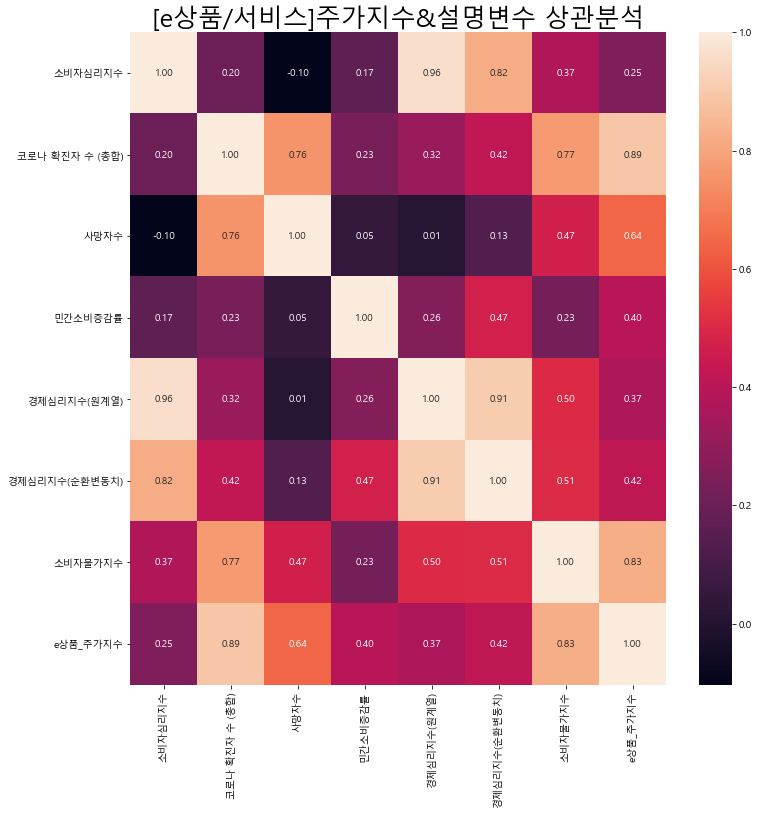

In [ ]:
corr = df_merge.corr()
fig, ax = plt.subplots(figsize  = (12, 12))
ax.set_title('[e상품/서비스]주가지수&설명변수 상관분석', fontsize= 25)
sns.heatmap(corr, annot = True, fmt = '.2f', ax = ax)

### 주가지수와 소비데이터 상관분석

In [ ]:
data = pd.read_csv(r'C:\Users\dudtj\OneDrive\Desktop\python\금융데이터\금융보안원_경진대회_데이터(최종제출)1.csv',encoding='euc-kr')
grouped_M = pd.DataFrame(data['매출금액'].groupby(data['기준년월']).sum())
grouped_C = pd.DataFrame(data['매출건수'].groupby(data['기준년월']).sum())
data_merge = pd.merge(grouped_M, grouped_C, on = '기준년월')
data_merge

매출금액     매출건수
기준년월                         
201903  202111436703  4545816
201909  192887379371  4116484
202003  230345211942  5354171
202009  239961787215  5279244
202103  271153457329  6128474

In [ ]:
def get_grouped(data, category, target, filter_category):
    filter_data = data[data[category] == target]
    grouped_filter = pd.DataFrame(filter_data[filter_category].groupby(filter_data['기준년월']).sum())
    grouped_filter.columns = [filter_category + '_' + target]
    return grouped_filter

#### 매출금액&주가지수 상관분석

In [ ]:
col_list = ['성별', '연령', '가구생애주기', '고객소재지_광역시도']
params_list = []
for cat in col_list:
    values_list = data[cat].unique().tolist()
    for  i in range(len(values_list)):
        params = [data, cat, values_list[i]]
        params_list.append(params)        

dfmerge_list_M = []
for param in params_list:
    dfmerge_list_M.append(get_grouped(param[0], param[1], param[2], '매출금액'))

df_merge_M = reduce(lambda left, right : pd.merge(left, right, on = '기준년월', how = 'outer'), dfmerge_list_M)
merge_list = [data_merge, df_merge_M] 
df_merge_all_M = reduce(lambda left, right : pd.merge(left, right, on = '기준년월', how = 'outer'), merge_list)
df_merge_all_M.drop('매출건수', axis = 1, inplace =True)

Timeindex = pd.date_range('2019.03', periods= 5, freq= '6M')
df_merge_all_M.index = Timeindex
df_merge_all_M.reset_index(inplace = True)
df_merge_all_M = pd.merge(df_merge_all_M, df_e, on = 'index', how = 'inner')
df_merge_all_M.set_index('index', inplace= True)
df_merge_all_M

매출금액       매출금액_여성      매출금액_남성     매출금액_40대     매출금액_20대  \
index                                                                           
2019-03-31  202111436703  132601252737  69510183966  68706580893  23080891048   
2019-09-30  192887379371  127887380811  64999998560  52676144724  40482343042   
2020-03-31  230345211942  159728181412  70617030530  68698805648  42708912043   
2020-09-30  239961787215  157245565792  82716221423  82573319228  31530145273   
2021-03-31  271153457329  182929390624  88224066705  88048224039  43287755528   

               매출금액_30대     매출금액_50대  매출금액_60대 이상  매출금액_20세 미만  매출금액_초중고자녀가구  \
index                                                                          
2019-03-31  88283095271  17944998606   4061111496     34759389   56711389441   
2019-09-30  76083547384  18132369659   4878330055    634644507   43291673490   
2020-03-31  88055717268  24320002365   6099512636    462261982   55903885942   
2020-09-30  75828873402  38348897184  11212553855    467998273   69477385343   
2021-03-31  94240599983  35326518291   9800307283    450052205   68331889229   

            매출금액_신혼영유아가구  매출금액_성인자녀가구    매출금액_1인가구    매출금액_노인가구    매출금액_서울특별시  \
index                                                                           
2019-03-31   96347422614  19422224719  25569288433   4061111496  125524998116   
2019-09-30   81512517656  19596842005  43608016165   4878330055  123152942807   
2020-03-31   94650269461  26385455268  47306088635   6099512636  146959575142   
2020-09-30   83353130359  40834970876  35083746782  11212553855  154202233574   
2021-03-31  105231122302  33528359025  54261779490   9800307283  171186758034   

               매출금액_경기도   매출금액_인천광역시      e상품_주가지수  
index                                               
2019-03-31  47324288671  29262149916  9.597818e-09  
2019-09-30  44821037828  24913398736  9.806813e-09  
2020-03-31  53913288271  29472348529  9.686582e-09  
2020-09-30  54253522959  31506030682  1.142012e-08  
2021-03-31  63321311652  36645387643  1.622327e-08

<AxesSubplot:title={'center':'[e상품/서비스]주가지수&매출금액 상관분석'}>

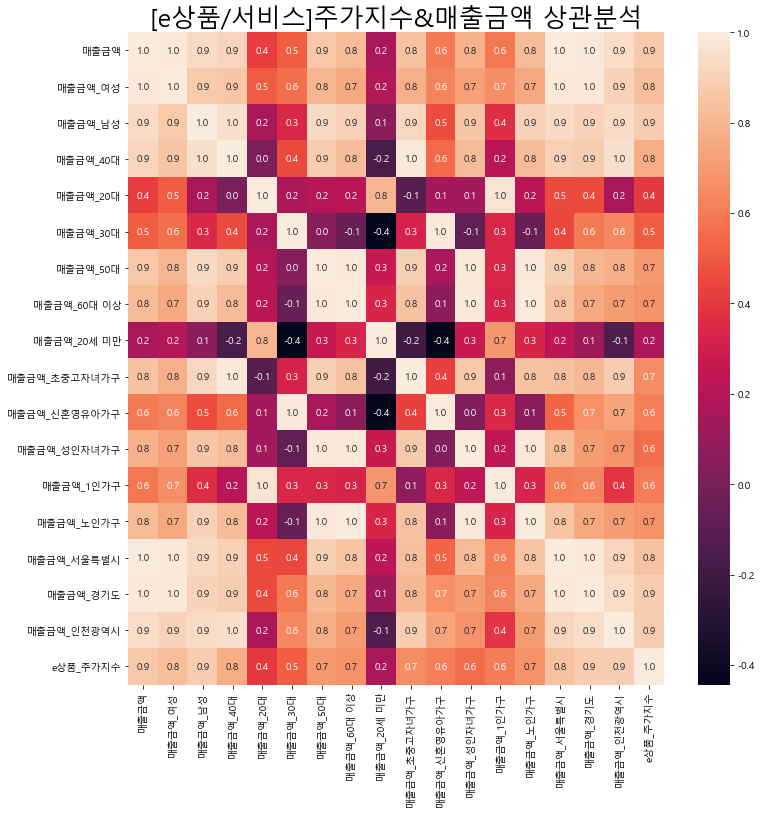

In [ ]:
corr = df_merge_all_M.corr()
fig, ax = plt.subplots(figsize = (12, 12))
ax.set_title('[e상품/서비스]주가지수&매출금액 상관분석', fontsize= 25)
sns.heatmap(corr, annot = True, fmt = '.1f', ax = ax)

#### 매출건수&주가지수 상관분석

In [ ]:
dfmerge_list_C = []
for param in params_list:
    dfmerge_list_C.append(get_grouped(param[0], param[1], param[2], '매출건수'))

df_merge_C = reduce(lambda left, right : pd.merge(left, right, on = '기준년월', how = 'outer'), dfmerge_list_C)
merge_list = [data_merge, df_merge_C]
df_merge_all_C = reduce(lambda left, right : pd.merge(left, right, on = '기준년월', how = 'outer'), merge_list)
df_merge_all_C.drop('매출금액', axis = 1, inplace =True)

Timeindex = pd.date_range('2019.03', periods= 5, freq= '6M')
df_merge_all_C.index = Timeindex
df_merge_all_C.reset_index(inplace = True)
df_merge_all_C = pd.merge(df_merge_all_C, df_e, on = 'index', how = 'inner')
df_merge_all_C.set_index('index', inplace= True)
df_merge_all_C

매출건수  매출건수_여성  매출건수_남성  매출건수_40대  매출건수_20대  매출건수_30대  매출건수_50대  \
index                                                                           
2019-03-31  4545816  3031625  1514191   1419543    664048   2047462    334892   
2019-09-30  4116484  2828557  1287927   1008794   1064897   1644172    296445   
2020-03-31  5354171  3827654  1526517   1454443   1224504   2074214    458931   
2020-09-30  5279244  3584798  1694446   1683197    923213   1748348    699860   
2021-03-31  6128474  4269399  1859075   1846989   1210474   2187130    669930   

            매출건수_60대 이상  매출건수_20세 미만  매출건수_초중고자녀가구  매출건수_신혼영유아가구  매출건수_성인자녀가구  \
index                                                                           
2019-03-31        78202         1669       1144029       2219261       373729   
2019-09-30        74337        27839        809853       1755201       331374   
2020-03-31       112931        29148       1170182       2203005       510238   
2020-09-30       197594        27032       1388300       1904420       761267   
2021-03-31       185504        28447       1400685       2398047       646197   

            매출건수_1인가구  매출건수_노인가구  매출건수_서울특별시  매출건수_경기도  매출건수_인천광역시  \
index                                                                
2019-03-31     730595      78202     2798132   1043980      703704   
2019-09-30    1145719      74337     2598582    935003      582899   
2020-03-31    1357815     112931     3390546   1232287      731338   
2020-09-30    1027663     197594     3353300   1188944      737000   
2021-03-31    1498041     185504     3819928   1414430      894116   

                e상품_주가지수  
index                     
2019-03-31  9.597818e-09  
2019-09-30  9.806813e-09  
2020-03-31  9.686582e-09  
2020-09-30  1.142012e-08  
2021-03-31  1.622327e-08

<AxesSubplot:title={'center':'[e상품/서비스]주가지수&매출건수 상관분석'}>

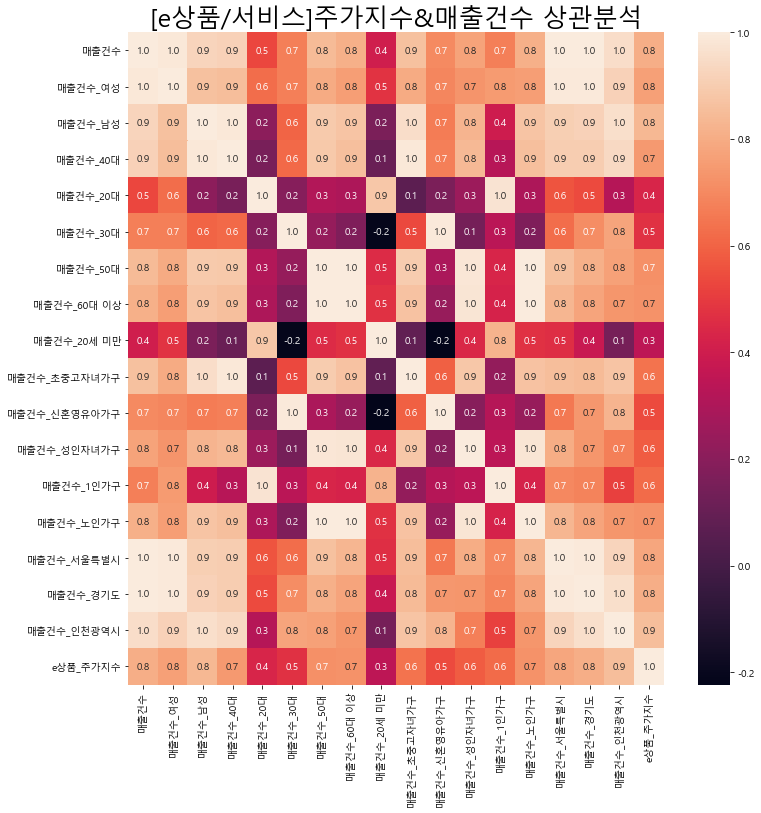

In [ ]:
corr = df_merge_all_C.corr()
fig, ax = plt.subplots(figsize = (12, 12))
ax.set_title('[e상품/서비스]주가지수&매출건수 상관분석', fontsize = 25)
sns.heatmap(corr, annot = True, fmt = '.1f', ax = ax)

## Upsampling

In [ ]:
merge_list = [data_merge, df_merge_M, df_merge_C]
df_merge_all = reduce(lambda left, right : pd.merge(left, right, on = '기준년월', how = 'outer'), merge_list)
df_merge_all

매출금액     매출건수       매출금액_여성      매출금액_남성     매출금액_40대  \
기준년월                                                                    
201903  202111436703  4545816  132601252737  69510183966  68706580893   
201909  192887379371  4116484  127887380811  64999998560  52676144724   
202003  230345211942  5354171  159728181412  70617030530  68698805648   
202009  239961787215  5279244  157245565792  82716221423  82573319228   
202103  271153457329  6128474  182929390624  88224066705  88048224039   

           매출금액_20대     매출금액_30대     매출금액_50대  매출금액_60대 이상  매출금액_20세 미만  ...  \
기준년월                                                                     ...   
201903  23080891048  88283095271  17944998606   4061111496     34759389  ...   
201909  40482343042  76083547384  18132369659   4878330055    634644507  ...   
202003  42708912043  88055717268  24320002365   6099512636    462261982  ...   
202009  31530145273  75828873402  38348897184  11212553855    467998273  ...   
202103  43287755528  94240599983  35326518291   9800307283    450052205  ...   

        매출건수_60대 이상  매출건수_20세 미만  매출건수_초중고자녀가구  매출건수_신혼영유아가구  매출건수_성인자녀가구  \
기준년월                                                                        
201903        78202         1669       1144029       2219261       373729   
201909        74337        27839        809853       1755201       331374   
202003       112931        29148       1170182       2203005       510238   
202009       197594        27032       1388300       1904420       761267   
202103       185504        28447       1400685       2398047       646197   

        매출건수_1인가구  매출건수_노인가구  매출건수_서울특별시  매출건수_경기도  매출건수_인천광역시  
기준년월                                                            
201903     730595      78202     2798132   1043980      703704  
201909    1145719      74337     2598582    935003      582899  
202003    1357815     112931     3390546   1232287      731338  
202009    1027663     197594     3353300   1188944      737000  
202103    1498041     185504     3819928   1414430      894116  

[5 rows x 34 columns]

In [ ]:
#rng : 먼저 기간 만들어주기
rng = pd.date_range('2019.03', periods=5, freq='6M')
df_merge_all.set_index(rng, inplace=True)
data_upsample1 = df_merge_all.resample('M').mean()
data_upsample=data_upsample1.interpolate(method='values')
data_upsample=data_upsample.reset_index().rename(columns={"index":"기준년월"})
data_upsample["기준년월"] = data_upsample["기준년월"].astype(str).str[:-3]
df=data_upsample
data_upsample1=data_upsample1.interpolate(method='values')
data_upsample1=data_upsample1.reset_index().rename(columns={"index":"기준년월"})

from random import *
def gab(title):
   lis1=list()
   b=list()
   for j in range(len(df[title])):
       if j%6==0:
           num=df[title][j]
           b.append(num)
       else:
           for i in range(10): #난수 개수 :500으로 지정 -> 더 늘려줘도 된다.
               num=uniform(df[title][j]*0.999999,df[title][j]*1.000001)
               lis1=[]
               lis1.append(num)
           a=np.mean(lis1)
           b.append(a)
        
   return(b)

lis1=list()
b=list()
for i in range(10):
    num=uniform(df['매출금액'][2]*0.999999,df['매출금액'][2]*1.000001)
    lis1.append(num)
a=np.mean(lis1)
b.append(a)

for i in range(1, len(data_upsample1.columns)):
    data_upsample1.iloc[:, i] = gab(df.columns[i]) 

In [ ]:
df_e.reset_index(inplace =True)

In [ ]:
df_e.set_index('index', inplace = True)
data_upsample1.set_index('기준년월', inplace = True)
data_upsample1.index.name = 'index'
data_upsample1

매출금액          매출건수       매출금액_여성       매출금액_남성  \
index                                                                
2019-03-31  2.021114e+11  4.545816e+06  1.326013e+11  6.951018e+10   
2019-04-30  2.005991e+11  4.475430e+06  1.318285e+11  6.877079e+10   
2019-05-31  1.990369e+11  4.402708e+06  1.310301e+11  6.800686e+10   
2019-06-30  1.975247e+11  4.332326e+06  1.302571e+11  6.726745e+10   
2019-07-31  1.959621e+11  4.259596e+06  1.294587e+11  6.650339e+10   
2019-08-31  1.943994e+11  4.186863e+06  1.286601e+11  6.573940e+10   
2019-09-30  1.928874e+11  4.116484e+06  1.278874e+11  6.500000e+10   
2019-10-31  1.992327e+11  4.326143e+06  1.332811e+11  6.595146e+10   
2019-11-30  2.053734e+11  4.529044e+06  1.385011e+11  6.687240e+10   
2019-12-31  2.117188e+11  4.738712e+06  1.438949e+11  6.782385e+10   
2020-01-31  2.180641e+11  4.948375e+06  1.492887e+11  6.877541e+10   
2020-02-29  2.239999e+11  5.144509e+06  1.543343e+11  6.966553e+10   
2020-03-31  2.303452e+11  5.354171e+06  1.597282e+11  7.061703e+10   
2020-04-30  2.319217e+11  5.341889e+06  1.593213e+11  7.260054e+10   
2020-05-31  2.335507e+11  5.329200e+06  1.589008e+11  7.465004e+10   
2020-06-30  2.351274e+11  5.316908e+06  1.584938e+11  7.663354e+10   
2020-07-31  2.367562e+11  5.304218e+06  1.580730e+11  7.868311e+10   
2020-08-31  2.383855e+11  5.291522e+06  1.576525e+11  8.073277e+10   
2020-09-30  2.399618e+11  5.279244e+06  1.572456e+11  8.271622e+10   
2020-10-31  2.452745e+11  5.423888e+06  1.616202e+11  8.365437e+10   
2020-11-30  2.504164e+11  5.563878e+06  1.658540e+11  8.456218e+10   
2020-12-31  2.557291e+11  5.708523e+06  1.702285e+11  8.550039e+10   
2021-01-31  2.610417e+11  5.853174e+06  1.746033e+11  8.643861e+10   
2021-02-28  2.658406e+11  5.983825e+06  1.785545e+11  8.728586e+10   
2021-03-31  2.711535e+11  6.128474e+06  1.829294e+11  8.822407e+10   

                매출금액_40대      매출금액_20대      매출금액_30대      매출금액_50대  \
index                                                                
2019-03-31  6.870658e+10  2.308089e+10  8.828310e+10  1.794500e+10   
2019-04-30  6.607862e+10  2.593359e+10  8.628314e+10  1.797572e+10   
2019-05-31  6.336316e+10  2.888139e+10  8.421666e+10  1.800745e+10   
2019-06-30  6.073521e+10  3.173405e+10  8.221658e+10  1.803818e+10   
2019-07-31  5.801964e+10  3.468186e+10  8.015003e+10  1.806991e+10   
2019-08-31  5.530404e+10  3.762966e+10  7.808350e+10  1.810165e+10   
2019-09-30  5.267614e+10  4.048234e+10  7.608355e+10  1.813237e+10   
2019-10-31  5.539033e+10  4.085950e+10  7.811164e+10  1.918054e+10   
2019-11-30  5.801707e+10  4.122450e+10  8.007427e+10  2.019490e+10   
2019-12-31  6.073124e+10  4.160173e+10  8.210229e+10  2.124308e+10   
2020-01-31  6.344554e+10  4.197890e+10  8.413046e+10  2.229127e+10   
2020-02-29  6.598452e+10  4.233176e+10  8.602764e+10  2.327183e+10   
2020-03-31  6.869881e+10  4.270891e+10  8.805572e+10  2.432000e+10   
2020-04-30  7.097332e+10  4.087633e+10  8.605136e+10  2.661983e+10   
2020-05-31  7.332357e+10  3.898265e+10  8.398011e+10  2.899632e+10   
2020-06-30  7.559823e+10  3.715005e+10  8.197566e+10  3.129614e+10   
2020-07-31  7.794845e+10  3.525643e+10  7.990454e+10  3.367262e+10   
2020-08-31  8.029875e+10  3.336274e+10  7.783322e+10  3.604909e+10   
2020-09-30  8.257332e+10  3.153015e+10  7.582887e+10  3.834890e+10   
2020-10-31  8.350594e+10  3.353284e+10  7.896487e+10  3.783407e+10   
2020-11-30  8.440831e+10  3.547085e+10  8.199976e+10  3.733592e+10   
2020-12-31  8.534082e+10  3.747353e+10  8.513587e+10  3.682107e+10   
2021-01-31  8.627333e+10  3.947620e+10  8.827198e+10  3.630628e+10   
2021-02-28  8.711566e+10  4.128508e+10  9.110460e+10  3.584133e+10   
2021-03-31  8.804822e+10  4.328776e+10  9.424060e+10  3.532652e+10   

             매출금액_60대 이상   매출금액_20세 미만  ...    매출건수_60대 이상   매출건수_20세 미만  \
index                                   ...                                
2019-03-31  4.061111e+09  3.475939e+07  ...   78202.000000   1669.000000   
2019-04-30

In [ ]:
df_merge_all = pd.merge(data_upsample1, df_e, on ='index', how = 'inner')
df_merge_all.drop('level_0', axis = 1, inplace = True)
df_merge_all

매출금액          매출건수       매출금액_여성       매출금액_남성  \
index                                                                
2019-03-31  2.021114e+11  4.545816e+06  1.326013e+11  6.951018e+10   
2019-04-30  2.005991e+11  4.475430e+06  1.318285e+11  6.877079e+10   
2019-05-31  1.990369e+11  4.402708e+06  1.310301e+11  6.800686e+10   
2019-06-30  1.975247e+11  4.332326e+06  1.302571e+11  6.726745e+10   
2019-07-31  1.959621e+11  4.259596e+06  1.294587e+11  6.650339e+10   
2019-08-31  1.943994e+11  4.186863e+06  1.286601e+11  6.573940e+10   
2019-09-30  1.928874e+11  4.116484e+06  1.278874e+11  6.500000e+10   
2019-10-31  1.992327e+11  4.326143e+06  1.332811e+11  6.595146e+10   
2019-11-30  2.053734e+11  4.529044e+06  1.385011e+11  6.687240e+10   
2019-12-31  2.117188e+11  4.738712e+06  1.438949e+11  6.782385e+10   
2020-01-31  2.180641e+11  4.948375e+06  1.492887e+11  6.877541e+10   
2020-02-29  2.239999e+11  5.144509e+06  1.543343e+11  6.966553e+10   
2020-03-31  2.303452e+11  5.354171e+06  1.597282e+11  7.061703e+10   
2020-04-30  2.319217e+11  5.341889e+06  1.593213e+11  7.260054e+10   
2020-05-31  2.335507e+11  5.329200e+06  1.589008e+11  7.465004e+10   
2020-06-30  2.351274e+11  5.316908e+06  1.584938e+11  7.663354e+10   
2020-07-31  2.367562e+11  5.304218e+06  1.580730e+11  7.868311e+10   
2020-08-31  2.383855e+11  5.291522e+06  1.576525e+11  8.073277e+10   
2020-09-30  2.399618e+11  5.279244e+06  1.572456e+11  8.271622e+10   
2020-10-31  2.452745e+11  5.423888e+06  1.616202e+11  8.365437e+10   
2020-11-30  2.504164e+11  5.563878e+06  1.658540e+11  8.456218e+10   
2020-12-31  2.557291e+11  5.708523e+06  1.702285e+11  8.550039e+10   
2021-01-31  2.610417e+11  5.853174e+06  1.746033e+11  8.643861e+10   
2021-02-28  2.658406e+11  5.983825e+06  1.785545e+11  8.728586e+10   
2021-03-31  2.711535e+11  6.128474e+06  1.829294e+11  8.822407e+10   

                매출금액_40대      매출금액_20대      매출금액_30대      매출금액_50대  \
index                                                                
2019-03-31  6.870658e+10  2.308089e+10  8.828310e+10  1.794500e+10   
2019-04-30  6.607862e+10  2.593359e+10  8.628314e+10  1.797572e+10   
2019-05-31  6.336316e+10  2.888139e+10  8.421666e+10  1.800745e+10   
2019-06-30  6.073521e+10  3.173405e+10  8.221658e+10  1.803818e+10   
2019-07-31  5.801964e+10  3.468186e+10  8.015003e+10  1.806991e+10   
2019-08-31  5.530404e+10  3.762966e+10  7.808350e+10  1.810165e+10   
2019-09-30  5.267614e+10  4.048234e+10  7.608355e+10  1.813237e+10   
2019-10-31  5.539033e+10  4.085950e+10  7.811164e+10  1.918054e+10   
2019-11-30  5.801707e+10  4.122450e+10  8.007427e+10  2.019490e+10   
2019-12-31  6.073124e+10  4.160173e+10  8.210229e+10  2.124308e+10   
2020-01-31  6.344554e+10  4.197890e+10  8.413046e+10  2.229127e+10   
2020-02-29  6.598452e+10  4.233176e+10  8.602764e+10  2.327183e+10   
2020-03-31  6.869881e+10  4.270891e+10  8.805572e+10  2.432000e+10   
2020-04-30  7.097332e+10  4.087633e+10  8.605136e+10  2.661983e+10   
2020-05-31  7.332357e+10  3.898265e+10  8.398011e+10  2.899632e+10   
2020-06-30  7.559823e+10  3.715005e+10  8.197566e+10  3.129614e+10   
2020-07-31  7.794845e+10  3.525643e+10  7.990454e+10  3.367262e+10   
2020-08-31  8.029875e+10  3.336274e+10  7.783322e+10  3.604909e+10   
2020-09-30  8.257332e+10  3.153015e+10  7.582887e+10  3.834890e+10   
2020-10-31  8.350594e+10  3.353284e+10  7.896487e+10  3.783407e+10   
2020-11-30  8.440831e+10  3.547085e+10  8.199976e+10  3.733592e+10   
2020-12-31  8.534082e+10  3.747353e+10  8.513587e+10  3.682107e+10   
2021-01-31  8.627333e+10  3.947620e+10  8.827198e+10  3.630628e+10   
2021-02-28  8.711566e+10  4.128508e+10  9.110460e+10  3.584133e+10   
2021-03-31  8.804822e+10  4.328776e+10  9.424060e+10  3.532652e+10   

             매출금액_60대 이상   매출금액_20세 미만  ...   매출건수_20세 미만  매출건수_초중고자녀가구  \
index                                   ...                               
2019-03-31  4.061111e+09  3.475939e+07  ...   1669.000000  1.144029e+06   
2019-04-30  4

<AxesSubplot:title={'center':'주가지수&소비데이터 상관분석'}>

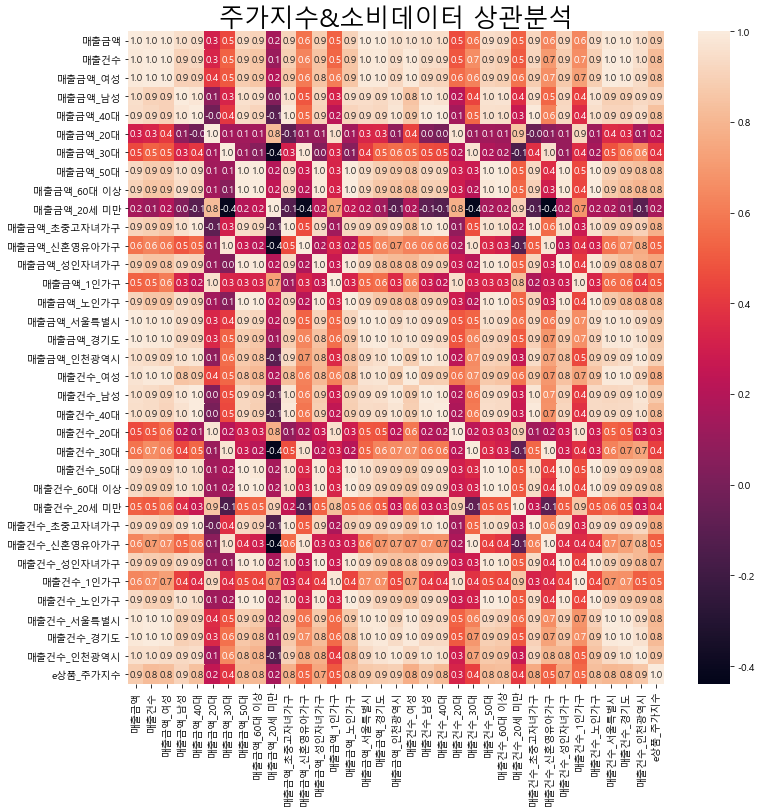

In [ ]:
corr = df_merge_all.corr()
fig, ax = plt.subplots(figsize = (12, 12))
ax.set_title('주가지수&소비데이터 상관분석', fontsize = 25)
sns.heatmap(corr, annot = True, fmt = '.1f', ax = ax)

In [ ]:
df_merge_all.reset_index(inplace = True)
df_merge_all = pd.merge(df2, df_merge_all, on = 'index', how = 'inner')
df_merge_all

index  소비자심리지수  코로나 확진자 수 (총합)   사망자수  민간소비증감률  경제심리지수(원계열)  \
0  2019-03-31    100.5             0.0    0.0      0.2         96.6   
1  2019-04-30    102.4             0.0    0.0      0.7         97.6   
2  2019-05-31     98.7             0.0    0.0      0.7         94.3   
3  2019-06-30     98.4             0.0    0.0      0.7         95.0   
4  2019-07-31     96.9             0.0    0.0      0.5         92.2   
5  2019-08-31     93.5             0.0    0.0      0.5         91.5   
6  2019-09-30     97.9             0.0    0.0      0.5         94.1   
7  2019-10-31     99.5             0.0    0.0      0.9         93.5   
8  2019-11-30    101.7             0.0    0.0      0.9         94.3   
9  2019-12-31    101.3             0.0    0.0      0.9         95.1   
10 2020-01-31    104.8            11.0    0.0     -6.6         97.5   
11 2020-02-29     97.8          2920.0   16.0     -6.6         90.1   
12 2020-03-31     80.4          6855.0  146.0     -6.6         69.9   
13 2020-04-30     73.3           979.0   85.0      1.2         63.1   
14 2020-05-31     79.7           703.0   23.0      1.2         64.9   
15 2020-06-30     83.7          1331.0   12.0      1.2         69.5   
16 2020-07-31     85.9          1506.0   19.0      0.2         77.8   
17 2020-08-31     89.7          5641.0   23.0      0.2         83.7   
18 2020-09-30     81.4          3865.0   89.0      0.2         78.1   
19 2020-10-31     92.9          2700.0   51.0     -1.3         89.0   
20 2020-11-30     99.0          7688.0   62.0     -1.3         91.9   
21 2020-12-31     91.2         26528.0  347.0     -1.3         86.1   
22 2021-01-31     95.4         17471.0  520.0      1.2         93.1   
23 2021-02-28     97.4         11467.0  183.0      1.2         96.6   
24 2021-03-31    100.5         13415.0  128.0      1.2        101.3   

    경제심리지수(순환변동치)  소비자물가지수          매출금액          매출건수  ...   매출건수_20세 미만  \
0            95.2   104.49  2.021114e+11  4.545816e+06  ...   1669.000000   
1            95.1   104.87  2.005991e+11  4.475430e+06  ...   5959.161334   
2            95.1   105.05  1.990369e+11  4.402708e+06  ...  10392.324668   
3            95.0   104.88  1.975247e+11  4.332326e+06  ...  14682.503669   
4            94.8   104.56  1.959621e+11  4.259596e+06  ...  19115.672245   
5            94.5   104.81  1.943994e+11  4.186863e+06  ...  23548.819686   
6            93.8   105.20  1.928874e+11  4.116484e+06  ...  27839.000000   
7            92.8   105.46  1.992327e+11  4.326143e+06  ...  28060.766203   
8            91.1   104.87  2.053734e+11  4.529044e+06  ...  28275.311327   
9            88.6   105.12  2.117188e+11  4.738712e+06  ...  28497.078298   
10           85.4   105.79  2.180641e+11  4.948375e+06  ...  28718.838435   
11           81.8   105.80  2.239999e+11  5.144509e+06  ...  28926.242182   
12           78.3   105.54  2.303452e+11  5.354171e+06  ...  29148.000000   
13           75.7   104.95  2.319217e+11  5.341889e+06  ...  28801.110232   
14           74.6   104.71  2.335507e+11  5.329200e+06  ...  28442.685146   
15           74.9   104.87  2.351274e+11  5.316908e+06  ...  28095.790426   
16           76.4   104.86  2.367562e+11  5.304218e+06  ...  27737.324456   
17           78.7   105.50  2.383855e+11  5.291522e+06  ...  27378.881161   
18           81.5   106.20  2.399618e+11  5.279244e+06  ...  27032.000000   
19           84.5   105.61  2.452745e+11  5.423888e+06  ...  27273.010442   
20           87.5   105.50  2.504164e+11  5.563878e+06  ...  27506.256062   
21           90.5   105.67  2.557291e+11  5.708523e+06  ...  27747.270367   
22           93.3   106.47  2.610417e+11  5.853174e+06  ...  27988.277768   
23           96.2   107.00  2.658406e+11  5.983825e+06  ...  28205.966741   
24           98.9   107.16  2.711535e+11  6.128474e+06  ...  28447.000000   

    매출건수_초중고자녀가구  매출건수_신혼영유아가구    매출건수_성인자녀가구     매출건수_1인가구      매출건수_노인가구  \
0   1.144029e+06  2.219261e+06  373729.000000  7.305950e+05   78202.000000   
1 

<AxesSubplot:title={'center':'주가지수&설명변수 상관분석'}>

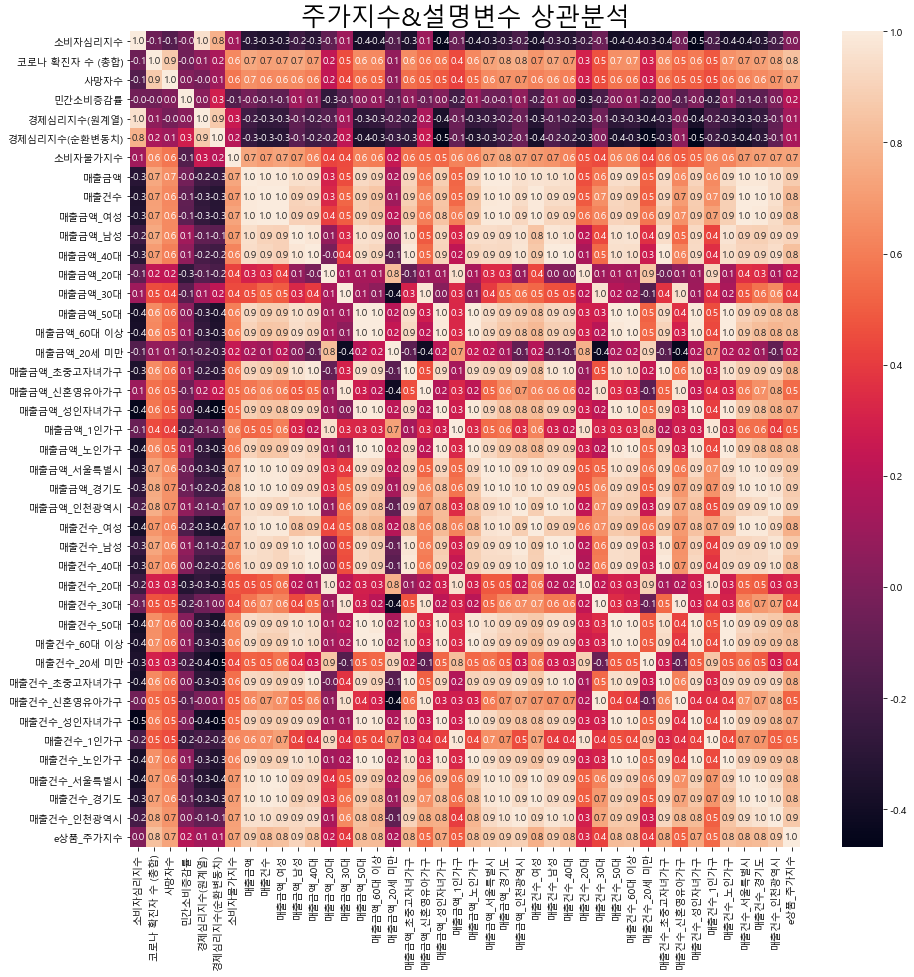

In [ ]:
corr = df_merge_all.corr()
fig, ax = plt.subplots(figsize = (15, 15))
ax.set_title('주가지수&설명변수 상관분석', fontsize = 25)
sns.heatmap(corr, annot = True, fmt = '.1f', ax = ax)

## PCA

In [ ]:
len(df_merge_all.columns)

43

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

y_target = df_merge_all['e상품_주가지수']
X_features = df_merge_all.drop('e상품_주가지수', axis = 1)
cols_bill = df_merge_all.iloc[:, 6:42].columns.tolist()
print('대상 속성명:', cols_bill)

scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components= 4)
pca.fit(df_cols_scaled)
pca_trans = pca.transform(df_cols_scaled)
print(pca_trans.shape)
print('PCA Component별 변동성: ', np.round(pca.explained_variance_ratio_, 3))

대상 속성명: ['경제심리지수(순환변동치)', '소비자물가지수', '매출금액', '매출건수', '매출금액_여성', '매출금액_남성', '매출금액_40대', '매출금액_20대', '매출금액_30대', '매출금액_50대', '매출금액_60대 이상', '매출금액_20세 미만', '매출금액_초중고자녀가구', '매출금액_신혼영유아가구', '매출금액_성인자녀가구', '매출금액_1인가구', '매출금액_노인가구', '매출금액_서울특별시', '매출금액_경기도', '매출금액_인천광역시', '매출건수_여성', '매출건수_남성', '매출건수_40대', '매출건수_20대', '매출건수_30대', '매출건수_50대', '매출건수_60대 이상', '매출건수_20세 미만', '매출건수_초중고자녀가구', '매출건수_신혼영유아가구', '매출건수_성인자녀가구', '매출건수_1인가구', '매출건수_노인가구', '매출건수_서울특별시', '매출건수_경기도', '매출건수_인천광역시']
(25, 4)
PCA Component별 변동성:  [0.694 0.147 0.119 0.034]


In [ ]:
pca_columns = ['pca_component_' + str(i) for i in range(1, 5)]
pca_DF = pd.DataFrame(pca_trans, columns = pca_columns)
pca_DF

pca_component_1  pca_component_2  pca_component_3  pca_component_4
0         -4.549581         6.751001        -1.146512         0.581892
1         -4.909527         5.087158        -0.864083         0.076573
2         -5.326271         3.389078        -0.534550        -0.319574
3         -5.800162         1.775629        -0.148504        -0.473159
4         -6.319040         0.120017         0.279785        -0.530213
5         -6.719075        -1.589477         0.602947        -0.942117
6         -7.072506        -3.264230         0.897126        -1.395809
7         -5.657918        -2.947686         0.203949        -1.140656
8         -4.457903        -2.576427        -0.291678        -0.284689
9         -3.034295        -2.283949        -0.948891         0.121913
10        -1.518475        -2.041610        -1.669341         0.327610
11        -0.223789        -1.768498        -2.213314         0.973117
12         1.101554        -1.445939        -2.751724         1.802578
13         1.396177        -1.112214        -1.320488         2.140464
14         1.765480        -0.774811         0.052766         2.099770
15         2.194063        -0.461505         1.276827         1.677584
16         2.591789        -0.101884         2.547695         1.238371
17         3.118288         0.211518         3.677926         0.306114
18         3.640255         0.516967         4.743469        -0.703170
19         4.384838         0.543660         3.361991        -0.384302
20         5.200191         0.528859         1.936036        -0.379876
21         6.102233         0.485907         0.411392        -0.547051
22         7.136273         0.381903        -1.227397        -1.097772
23         8.027607         0.311782        -2.679744        -1.507916
24         8.929793         0.264750        -4.195685        -1.639682

In [ ]:
mergeDF_pca = df_merge_all.iloc[:, 0:8]
mergeDF_pca.reset_index(inplace = True)
mergeDF_pca = mergeDF_pca.join(pca_DF)
y_target_reset = y_target
y_target_reset.index = mergeDF_pca['index'].astype(str).str[:-3]
y_target_reset = y_target_reset.reset_index()
mergeDF_pca['index'] = mergeDF_pca['index'].astype(str).str[:-3]
mergeDF_pca.drop('level_0', axis = 1, inplace =True)
mergeDF_pca = pd.merge(mergeDF_pca, y_target_reset, on = 'index', how = 'inner')
mergeDF_pca

index  소비자심리지수  코로나 확진자 수 (총합)   사망자수  민간소비증감률  경제심리지수(원계열)  \
0   2019-03    100.5             0.0    0.0      0.2         96.6   
1   2019-04    102.4             0.0    0.0      0.7         97.6   
2   2019-05     98.7             0.0    0.0      0.7         94.3   
3   2019-06     98.4             0.0    0.0      0.7         95.0   
4   2019-07     96.9             0.0    0.0      0.5         92.2   
5   2019-08     93.5             0.0    0.0      0.5         91.5   
6   2019-09     97.9             0.0    0.0      0.5         94.1   
7   2019-10     99.5             0.0    0.0      0.9         93.5   
8   2019-11    101.7             0.0    0.0      0.9         94.3   
9   2019-12    101.3             0.0    0.0      0.9         95.1   
10  2020-01    104.8            11.0    0.0     -6.6         97.5   
11  2020-02     97.8          2920.0   16.0     -6.6         90.1   
12  2020-03     80.4          6855.0  146.0     -6.6         69.9   
13  2020-04     73.3           979.0   85.0      1.2         63.1   
14  2020-05     79.7           703.0   23.0      1.2         64.9   
15  2020-06     83.7          1331.0   12.0      1.2         69.5   
16  2020-07     85.9          1506.0   19.0      0.2         77.8   
17  2020-08     89.7          5641.0   23.0      0.2         83.7   
18  2020-09     81.4          3865.0   89.0      0.2         78.1   
19  2020-10     92.9          2700.0   51.0     -1.3         89.0   
20  2020-11     99.0          7688.0   62.0     -1.3         91.9   
21  2020-12     91.2         26528.0  347.0     -1.3         86.1   
22  2021-01     95.4         17471.0  520.0      1.2         93.1   
23  2021-02     97.4         11467.0  183.0      1.2         96.6   
24  2021-03    100.5         13415.0  128.0      1.2        101.3   

    경제심리지수(순환변동치)  소비자물가지수  pca_component_1  pca_component_2  pca_component_3  \
0            95.2   104.49        -4.549581         6.751001        -1.146512   
1            95.1   104.87        -4.909527         5.087158        -0.864083   
2            95.1   105.05        -5.326271         3.389078        -0.534550   
3            95.0   104.88        -5.800162         1.775629        -0.148504   
4            94.8   104.56        -6.319040         0.120017         0.279785   
5            94.5   104.81        -6.719075        -1.589477         0.602947   
6            93.8   105.20        -7.072506        -3.264230         0.897126   
7            92.8   105.46        -5.657918        -2.947686         0.203949   
8            91.1   104.87        -4.457903        -2.576427        -0.291678   
9            88.6   105.12        -3.034295        -2.283949        -0.948891   
10           85.4   105.79        -1.518475        -2.041610        -1.669341   
11           81.8   105.80        -0.223789        -1.768498        -2.213314   
12           78.3   105.54         1.101554        -1.445939        -2.751724   
13           75.7   104.95         1.396177        -1.112214        -1.320488   
14           74.6   104.71         1.765480        -0.774811         0.052766   
15           74.9   104.87         2.194063        -0.461505         1.276827   
16           76.4   104.86         2.591789        -0.101884         2.547695   
17           78.7   105.50         3.118288         0.211518         3.677926   
18           81.5   106.20         3.640255         0.516967         4.743469   
19           84.5   105.61         4.384838         0.543660         3.361991   
20           87.5   105.50         5.200191         0.528859         1.936036   
21           90.5   105.67         6.102233         0.485907         0.411392   
22           93.3   106.47         7.136273         0.381903        -1.227397   
23           96.2   107.00         8.027607         0.311782        -2.679744   
24           98.9   107.16         8.929793         0.264750        -4.195685   

    pca_component_4  e상품_주가지수  
0          0.581892 -0.736364  
1          0.076573 -1.017805  
2       

<AxesSubplot:title={'center':'PCA기법 적용 후 상관분석'}>

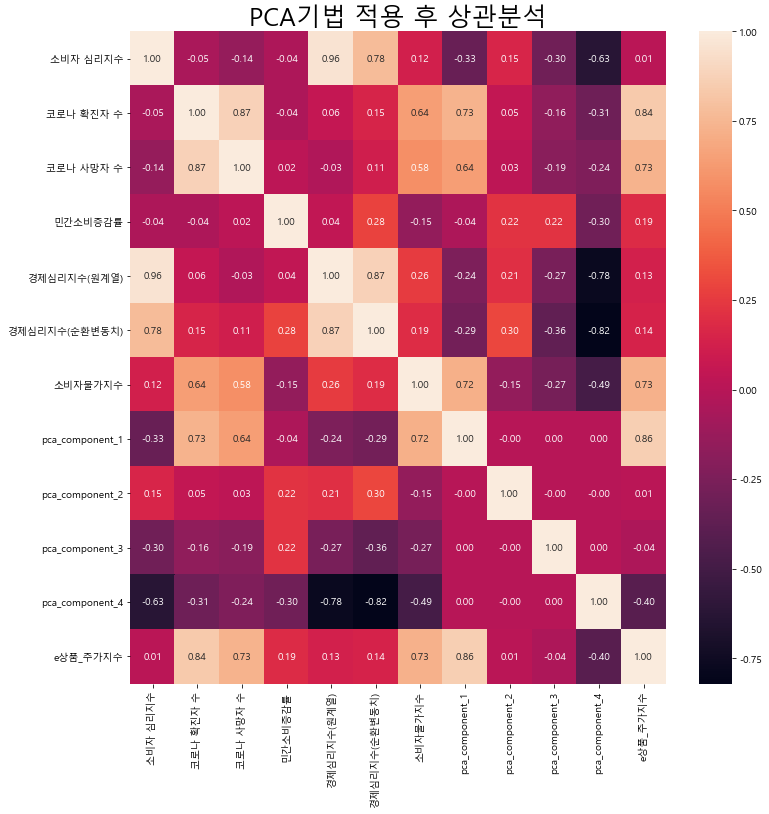

In [ ]:
corr = mergeDF_pca.corr()
fig, ax = plt.subplots(figsize = (12, 12))
ax.set_title('PCA기법 적용 후 상관분석', fontsize= 25)
sns.heatmap(corr, annot = True, fmt = '.2f', ax = ax)

<AxesSubplot:title={'center':'Feature drop 후 상관분석'}>

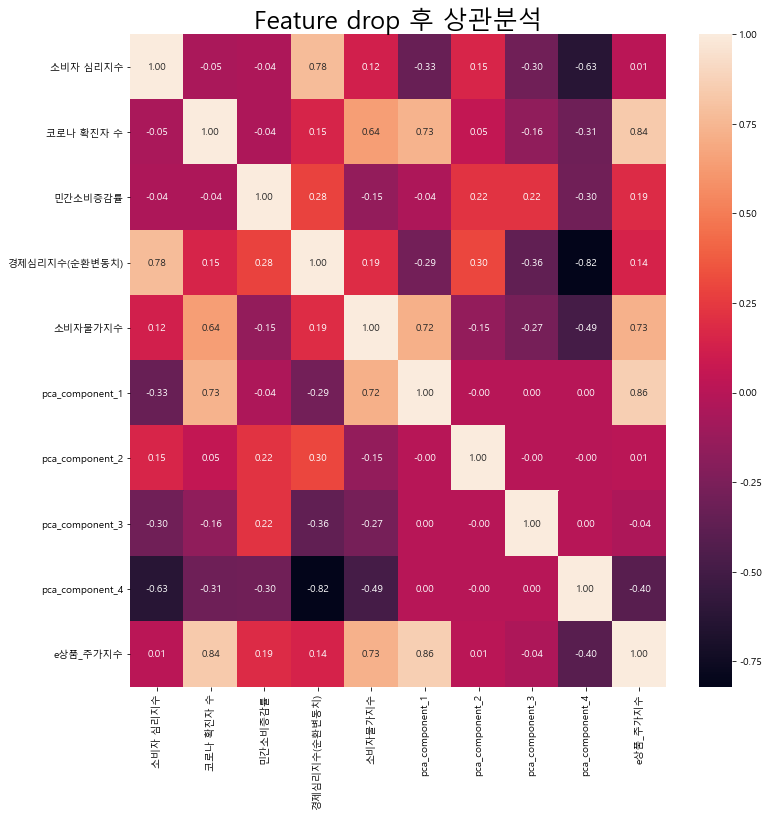

In [ ]:
mergeDF_pca.drop(['코로나 사망자 수', '경제심리지수(원계열)'], axis = 1, inplace = True)
corr = mergeDF_pca.corr()
fig, ax = plt.subplots(figsize = (12, 12))
ax.set_title('Feature drop 후 상관분석', fontsize = 25)
sns.heatmap(corr, annot = True, fmt = '.2f', ax = ax)

## Modeling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score


mergeDF_pca.set_index('index', inplace = True)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(mergeDF_pca)
data_scaled = pd.DataFrame(data_scaled, columns= mergeDF_pca.columns)

X_features = data_scaled.drop('e상품_주가지수', axis = 1)
y_target = data_scaled['e상품_주가지수']

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2, random_state=0)
rf_reg = RandomForestRegressor(n_estimators = 3000, random_state= 0, n_jobs=-1, criterion= 'mse', min_samples_split= 3, max_depth= 5, max_features= 7, min_samples_leaf =1, max_leaf_nodes = 12)
rf_reg.fit(X_train, y_train)
y_preds = rf_reg.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

rf_reg = RandomForestRegressor(random_state=0)
gbm_reg = GradientBoostingRegressor(random_state=0)
xgb_reg = XGBRegressor(random_state=0)
lgbm_reg = LGBMRegressor(random_state=0)

rf_reg.fit(X_train, y_train)
rf_preds = rf_reg.predict(X_test)

gbm_reg.fit(X_train, y_train)
gbm_preds = gbm_reg.predict(X_test)

xgb_reg.fit(X_train, y_train)
xgb_preds = xgb_reg.predict(X_test)

lgbm_reg.fit(X_train, y_train)
lgbm_preds = lgbm_reg.predict(X_test)

name_list = ['RandomForestRegressor', 'GradientBoostingRegressor', 'XGBRegressor', 'LGBMRegressor']
preds_list = [rf_preds, gbm_preds, xgb_preds, lgbm_preds]
for preds, name in zip(preds_list, name_list):
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    print("####{0}####".format(name))
    print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
    print('Variance score: {0:.3f}'.format(r2_score(y_test, preds)))

KeyError: "None of ['index'] are in the columns"

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [1000, 5000, 10000],
    'max_depth' : [2, 3, 4],
    'min_samples_split' : [2, 3, 4]
}

rf_reg = RandomForestRegressor(random_state= 0, n_jobs=-1, criterion= 'mse')
grid_cv = GridSearchCV(rf_reg, param_grid= params, cv = 3, n_jobs= -1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 mse 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSerachCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

GridSearchCV 최고 평균 mse 수치: -0.1032
GridSerachCV 최적 하이퍼 파라미터: {'max_depth': 4, 'min_samples_split': 3, 'n_estimators': 5000}


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [3000, 5000, 8000],
    'max_depth' : [4, 5, 6],
    'max_features' : [5, 6, 7, 8]
}

rf_reg = RandomForestRegressor(random_state= 0, n_jobs=-1, criterion= 'mse', min_samples_split= 3)
grid_cv = GridSearchCV(rf_reg, param_grid= params, cv = 3, n_jobs= -1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 mse 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSerachCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

GridSearchCV 최고 평균 mse 수치: -0.0152
GridSerachCV 최적 하이퍼 파라미터: {'max_depth': 5, 'max_features': 7, 'n_estimators': 3000}


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [2000, 3000, 4000],
    'max_leaf_nodes' : [5, 10, 15],
    'min_samples_leaf' : [1, 3, 5, 7] 
}

rf_reg = RandomForestRegressor(random_state= 0, n_jobs=-1, criterion= 'mse', min_samples_split= 3, max_depth= 5, max_features= 7)
grid_cv = GridSearchCV(rf_reg, param_grid= params, cv = 3, n_jobs= -1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 mse 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSerachCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

GridSearchCV 최고 평균 mse 수치: -0.0133
GridSerachCV 최적 하이퍼 파라미터: {'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'n_estimators': 3000}


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_leaf_nodes' : [8, 10, 12]
}

rf_reg = RandomForestRegressor(n_estimators = 3000, random_state= 0, n_jobs=-1, criterion= 'mse', min_samples_split= 3, max_depth= 5, max_features= 7, min_samples_leaf =1)
grid_cv = GridSearchCV(rf_reg, param_grid= params, cv = 3, n_jobs= -1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 mse 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSerachCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

GridSearchCV 최고 평균 mse 수치: -0.0133
GridSerachCV 최적 하이퍼 파라미터: {'max_leaf_nodes': 8}


Text(0.5, 1.0, '설명변수 중요도 파악')

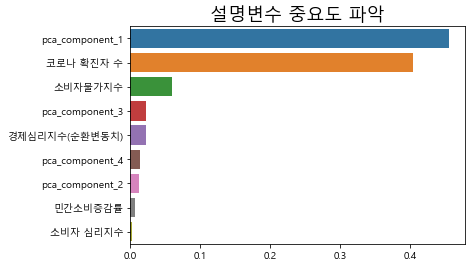

In [ ]:
rf_reg = RandomForestRegressor(n_estimators = 3000, random_state= 0, n_jobs=-1, criterion= 'mse', min_samples_split= 3, max_depth= 5, max_features= 7, min_samples_leaf =1, max_leaf_nodes = 12)
rf_reg.fit(X_train, y_train)

feature_series = pd.Series(data = rf_reg.feature_importances_, index = X_train.columns)
feature_series = feature_series.sort_values(ascending = False)
ax=sns.barplot(x = feature_series, y = feature_series.index)
ax.set_title("설명변수 중요도 파악",fontsize=18)

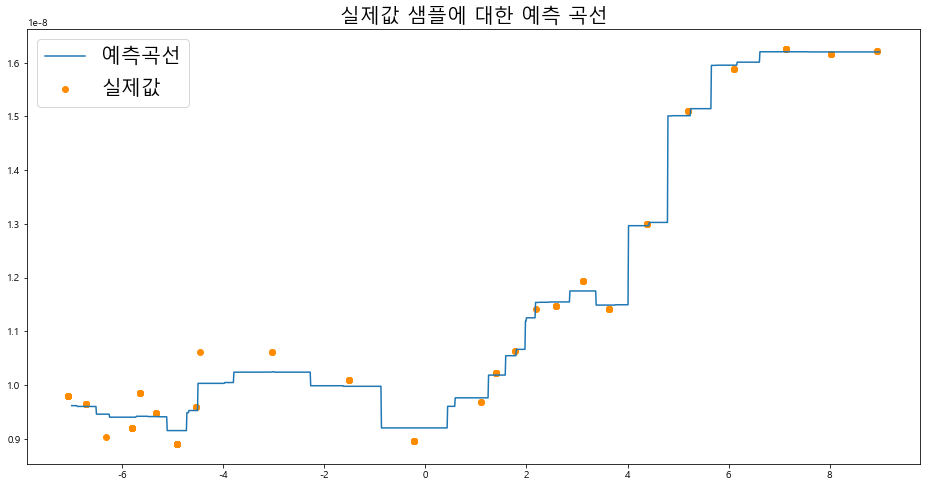

In [ ]:

reg = RandomForestRegressor(n_estimators = 3000, random_state= 0, n_jobs=-1, criterion= 'mse', min_samples_split= 3, max_depth= 5, min_samples_leaf =1, max_leaf_nodes = 12)
X_test = np.arange(-7, 9, 0.01).reshape(-1, 1)

mergeDF_pca_sample = mergeDF_pca[['pca_component_1', 'e상품_주가지수']]
mergeDF_pca_sample = mergeDF_pca_sample.sample(n = 100, replace= True)

X_features = mergeDF_pca_sample['pca_component_1'].values.reshape(-1, 1)
y_target = mergeDF_pca_sample['e상품_주가지수'].values.reshape(-1, 1)

reg.fit(X_features, y_target)
pred = reg.predict(X_test)

fig, ax = plt.subplots(figsize = (16, 8))
ax.scatter(mergeDF_pca_sample.pca_component_1, mergeDF_pca_sample.e상품_주가지수, c = 'darkorange',label='실제값')
ax.plot(X_test, pred,label='예측곡선')
ax.set_title("실제값 샘플에 대한 예측 곡선",fontsize=20)
ax.legend(fontsize='20')
plt.show()

In [ ]:
data_scaled

소비자 심리지수  코로나 확진자 수   민간소비증감률  경제심리지수(순환변동치)   소비자물가지수  pca_component_1  \
0   0.816089  -0.630376  0.238624       0.961587 -1.303471        -0.910091   
1   1.046007  -0.630376  0.445763       0.948648 -0.757725        -0.982094   
2   0.598272  -0.630376  0.445763       0.948648 -0.499214        -1.065459   
3   0.561969  -0.630376  0.445763       0.935710 -0.743363        -1.160255   
4   0.380454  -0.630376  0.362907       0.909833 -1.202939        -1.264051   
5  -0.030978  -0.630376  0.362907       0.871017 -0.843896        -1.344073   
6   0.501464  -0.630376  0.362907       0.780448 -0.283788        -1.414773   
7   0.695079  -0.630376  0.528618       0.651064  0.089617        -1.131801   
8   0.961301  -0.630376  0.528618       0.431110 -0.757725        -0.891752   
9   0.912897  -0.630376  0.528618       0.107648 -0.398682        -0.606976   
10  1.336430  -0.628695 -2.578464      -0.306383  0.563555        -0.303753   
11  0.489363  -0.183951 -2.578464      -0.772168  0.577916        -0.044766   
12 -1.616205   0.417652 -2.578464      -1.225014  0.204511         0.220353   
13 -2.475373  -0.480702  0.652902      -1.561414 -0.642831         0.279289   
14 -1.700911  -0.522898  0.652902      -1.703737 -0.987513         0.353164   
15 -1.216873  -0.426886  0.652902      -1.664922 -0.757725         0.438897   
16 -0.950652  -0.400131  0.238624      -1.470845 -0.772087         0.518458   
17 -0.490815   0.232049  0.238624      -1.173260  0.147064         0.623778   
18 -1.495195  -0.039475  0.238624      -0.810983  1.152386         0.728191   
19 -0.103584  -0.217586 -0.382793      -0.422829  0.305043         0.877136   
20  0.634575   0.545005 -0.382793      -0.034675  0.147064         1.040238   
21 -0.309301   3.425362 -0.382793       0.353479  0.391214         1.220681   
22  0.198940   2.040681  0.652902       0.715756  1.540153         1.427529   
23  0.440959   1.122758  0.652902       1.090971  2.301325         1.605830   
24  0.816089   1.420579  0.652902       1.440310  2.531112         1.786302   

    pca_component_2  pca_component_3  pca_component_4  e상품_주가지수  
0          2.930050        -0.553394         0.529664 -0.736364  
1          2.207914        -0.417072         0.069700 -1.017805  
2          1.470918        -0.258015        -0.290890 -0.781047  
3          0.770654        -0.071679        -0.430690 -0.896617  
4          0.052089         0.135046        -0.482623 -0.965367  
5         -0.689860         0.291028        -0.857557 -0.715234  
6         -1.416732         0.433021        -1.270527 -0.651495  
7         -1.279346         0.098441        -1.038275 -0.634368  
8         -1.118213        -0.140786        -0.259137 -0.318654  
9         -0.991273        -0.458007         0.110971 -0.324626  
10        -0.886094        -0.805751         0.298205 -0.531077  
11        -0.767558        -1.068314         0.885774 -0.993581  
12        -0.627562        -1.328192         1.640787 -0.700319  
13        -0.482720        -0.637368         1.948345 -0.480879  
14        -0.336281         0.025469         1.911304 -0.316981  
15        -0.200301         0.616294         1.527011  0.002467  
16        -0.044219         1.229712         1.127220  0.027467  
17         0.091802         1.775248         0.278639  0.215564  
18         0.224373         2.289560        -0.640057  0.003635  
19         0.235958         1.622753        -0.349808  0.643129  
20         0.229534         0.934479        -0.345780  1.501960  
21         0.210892         0.198569        -0.497950  1.816143  
22         0.165753        -0.592435        -0.999241  1.969569  
23         0.135319        -1.293449        -1.372572  1.930380  
24         0.114906        -2.025158        -1.492511  1.954100

In [ ]:
X_features = data_scaled.drop('e상품_주가지수', axis = 1)
y_target = data_scaled['e상품_주가지수']

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2, random_state=0)

In [ ]:
X_test

소비자 심리지수  코로나 확진자 수   민간소비증감률  경제심리지수(순환변동치)   소비자물가지수  pca_component_1  \
5  -0.030978  -0.630376  0.362907       0.871017 -0.843896        -1.344073   
2   0.598272  -0.630376  0.445763       0.948648 -0.499214        -1.065459   
19 -0.103584  -0.217586 -0.382793      -0.422829  0.305043         0.877136   
16 -0.950652  -0.400131  0.238624      -1.470845 -0.772087         0.518458   
11  0.489363  -0.183951 -2.578464      -0.772168  0.577916        -0.044766   

    pca_component_2  pca_component_3  pca_component_4  
5         -0.689860         0.291028        -0.857557  
2          1.470918        -0.258015        -0.290890  
19         0.235958         1.622753        -0.349808  
16        -0.044219         1.229712         1.127220  
11        -0.767558        -1.068314         0.885774

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X_features = data_scaled.drop('e상품_주가지수', axis = 1)
y_target = data_scaled['e상품_주가지수']

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2, random_state=0)

rf_reg = RandomForestRegressor(n_estimators = 3000, random_state= 0, n_jobs=-1, criterion= 'mse', min_samples_split= 3, max_depth= 5, max_features= 7, min_samples_leaf =1, max_leaf_nodes = 12)
rf_reg.fit(X_train, y_train)
y_preds = rf_reg.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))

MSE : 0.085, RMSE : 0.291


In [ ]:
ax.text(5, -1.0, '실제값', style='italic',
        bbox={'facecolor': 'blue', 'alpha': 0.5, 'pad': 5})
ax.text(5, -0.6, '예측값', style='italic',
        bbox={'facecolor': 'orange', 'alpha': 0.5, 'pad': 5})

Text(5, -0.6, '예측값')

In [ ]:
y_test

5    -0.715234
2    -0.781047
19    0.643129
16    0.027467
11   -0.993581
Name: e상품_주가지수, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

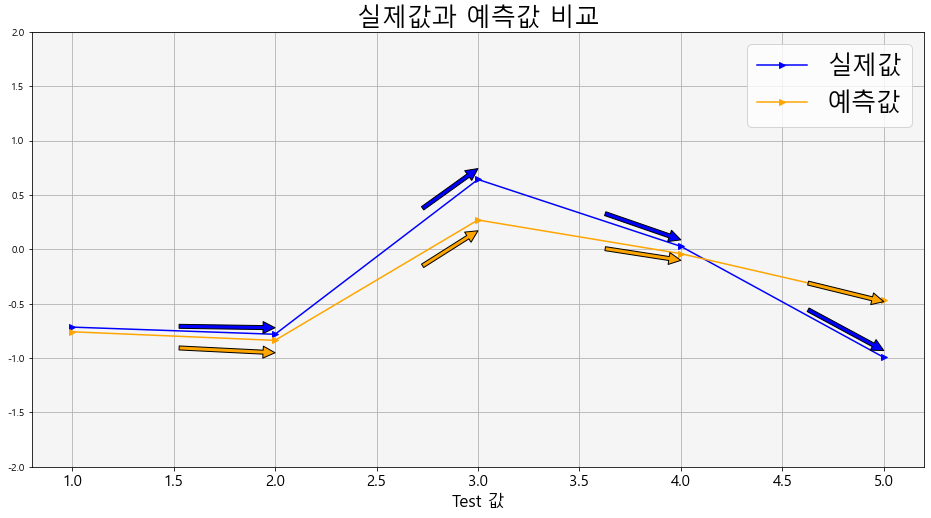

In [ ]:
X = np.array([1, 2, 3, 4, 5])
fig, ax = plt.subplots(figsize = (16, 8))
ax.plot(X, y_test,'->', color = 'blue',label='실제값')
ax.plot(X, y_preds,'->', color = 'orange',label='예측값')

plt.title('실제값과 예측값 비교', fontsize = 25)

plt.xticks(fontsize = 15)
plt.xlabel('Test 값', fontsize = 17)
plt.ylim(-2,2)
ax.set_facecolor('whitesmoke')
ax.grid(True)
plt.annotate(' ',xy=(2.0,-0.721047),xytext=(1.5, -0.689234),arrowprops=dict(facecolor='blue'))
plt.annotate(' ',xy=(3.0,0.743129),xytext=(2.7,0.3),arrowprops=dict(facecolor='blue'))
plt.annotate(' ',xy=(4.0,0.087467),xytext=(3.6, 0.353129),arrowprops=dict(facecolor='blue'))
plt.annotate(' ',xy=(5.0,-0.931047),xytext=(4.6, -0.527467),arrowprops=dict(facecolor='blue'))

plt.annotate(' ',xy=(2.0,-0.951047),xytext=(1.5, -0.887467),arrowprops=dict(facecolor='orange'))
plt.annotate(' ',xy=(3.0,0.171047),xytext=(2.7, -0.227467),arrowprops=dict(facecolor='orange'))
plt.annotate(' ',xy=(4.0,-0.101047),xytext=(3.6, 0.027467),arrowprops=dict(facecolor='orange'))
plt.annotate(' ',xy=(5.0,-0.481047),xytext=(4.6, -0.287467),arrowprops=dict(facecolor='orange'))
ax.legend( fontsize = 25) 
plt.show